#### Author: Mitchell Ren | Date: 08/16/2023 | Contact: mitchell.mathew.ren@gmail.com

# Business & Data Understanding

My goal is to build models to make predictions for the NBA's yearly accolade selections. I will focus my investigation on the Most Valuable Player and Defensive Player of the Year awards. Knowing that these awards are voted on by the media every year - I am interested to understand how objective the selections are compared to the statistical results from a given season. Ultimately the models I build to make future predictions will retain the subjectivity / biases of the media members who voted, however I feel this is ok so long as we can establish both objective and subjective (narrative) voting criteria.


| Feature | Feature Description |
|:---:|:---:|
| 2P | 2-Point Field Goals |
| 2P% | 2-Point Field Goal Percentage; the formula is 2P / 2PA |
| 2PA | 2-Point Field Goal Attempts |
| 3P | 3-Point Field Goals (available since the 1979-80 season in the NBA) |
| 3P% | 3-Point Field Goal Percentage (available since the 1979-80 season in the NBA); the formula is 3P / 3PA |
| 3PA | 3-Point Field Goal Attempts (available since the 1979-80 season in the NBA) |
| Age | Age; player age on February 1 of the given season |
| AST | Assists |
| AST% | Assist Percentage (available since the 1964-65 season in the NBA); the formula is 100 * AST / (((MP / (Tm MP / 5)) * Tm FG) - FG). Assist percentage is an estimate of the percentage of teammate field goals a player assisted while he was on the floor |
| Award Share | The formula is (award points) / (maximum number of award points). For example, in the 2002-03 MVP voting Tim Duncan had 962 points out of a possible 1190. His MVP award share is 962 / 1190 = 0.81 |
| BLK | Blocks (available since the 1973-74 season in the NBA) |
| BLK% | Block Percentage (available since the 1973-74 season in the NBA); the formula is 100 * (BLK * (Tm MP / 5)) / (MP * (Opp FGA - Opp 3PA)). Block percentage is an estimate of the percentage of opponent two-point field goal attempts blocked by the player while he was on the floor |
| BPM | Box Plus/Minus (available since the 1973-74 season in the NBA); a box score estimate of the points per 100 possessions that a player contributed above a league-average player, translated to an average team. Please see the article About Box Plus/Minus (BPM) for more information |
| DPOY | Defensive Player of the Year |
| DRB | Defensive Rebounds (available since the 1973-74 season in the NBA) |
| DRB% | Defensive Rebound Percentage (available since the 1970-71 season in the NBA); the formula is 100 * (DRB * (Tm MP / 5)) / (MP * (Tm DRB + Opp ORB)). Defensive rebound percentage is an estimate of the percentage of available defensive rebounds a player grabbed while he was on the floor |
| DRtg | Defensive Rating (available since the 1973-74 season in the NBA); for players and teams it is points allowed per 100 posessions. This rating was developed by Dean Oliver, author of Basketball on Paper. Please see the article Calculating Individual Offensive and Defensive Ratings for more information |
| DWS | Defensive Win Shares; please see the article Calculating Win Shares for more information |
| eFG% | Effective Field Goal Percentage; the formula is (FG + 0.5 * 3P) / FGA. This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal. For example, suppose Player A goes 4 for 10 with 2 threes, while Player B goes 5 for 10 with 0 threes. Each player would have 10 points from field goals, and thus would have the same effective field goal percentage (50%) |
| FG | Field Goals (includes both 2-point field goals and 3-point field goals) |
| FG% | Field Goal Percentage; the formula is FG / FGA |
| FGA | Field Goal Attempts (includes both 2-point field goal attempts and 3-point field goal attempts) |
| FT | Free Throws |
| FT% | Free Throw Percentage; the formula is FT / FTA |
| FTA | Free Throw Attempts |
| G | Games |
| GB | Games Behind; the formula is ((first W - W) + (L - first L)) / 2, where first W and first L stand for wins and losses by the first place team, respectively |
| GS | Games Started |
| L | Losses |
| MVP | Most Valuable Player |
| MP | Minutes Played |
| ORtg | Offensive Rating (available since the 1977-78 season in the NBA); for players it is points produced per 100 posessions, while for teams it is points scored per 100 possessions. This rating was developed by Dean Oliver, author of Basketball on Paper. Please see the article Calculating Individual Offensive and Defensive Ratings for more information |
| ORB | Offensive Rebounds (available since the 1973-74 season in the NBA) |
| ORB% | Offensive Rebound Percentage (available since the 1970-71 season in the NBA); the formula is 100 * (ORB * (Tm MP / 5)) / (MP * (Tm ORB + Opp DRB)). Offensive rebound percentage is an estimate of the percentage of available offensive rebounds a player grabbed while he was on the floor |
| OWS | Offensive Win Shares; please see the article Calculating Win Shares for more information |
| PER | Player Efficiency Rating (available since the 1951-52 season); PER is a rating developed by ESPN.com columnist John Hollinger. In John's words, "The PER sums up all a player's positive accomplishments, subtracts the negative accomplishments, and returns a per-minute rating of a player's performance." Please see the article Calculating PER for more information |
| Per 36 Minutes | A statistic (e.g., assists) divided by minutes played, multiplied by 36 |
| Per Game | A statistic (e.g., assists) divided by games |
| PF | Personal Fouls |
| PTS | Points |
| STL | Steals (available since the 1973-74 season in the NBA) |
| STL% | Steal Percentage (available since the 1973-74 season in the NBA); the formula is 100 * (STL * (Tm MP / 5)) / (MP * Opp Poss). Steal Percentage is an estimate of the percentage of opponent possessions that end with a steal by the player while he was on the floor |
| Tm | Team |
| TOV | Turnovers (available since the 1977-78 season in the NBA) |
| TOV% | Turnover Percentage (available since the 1977-78 season in the NBA); the formula is 100 * TOV / (FGA + 0.44 * FTA + TOV). Turnover percentage is an estimate of turnovers per 100 plays |
| TRB | Total Rebounds (available since the 1950-51 season) |
| TRB% | Total Rebound Percentage (available since the 1970-71 season in the NBA); the formula is 100 * (TRB * (Tm MP / 5)) / (MP * (Tm TRB + Opp TRB)). Total rebound percentage is an estimate of the percentage of available rebounds a player grabbed while he was on the floor |
| TS% | True Shooting Percentage; the formula is PTS / (2 * TSA). True shooting percentage is a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws |
| VORP | VORP - Value Over Replacement Player (available since the 1973-74 season in the NBA); a box score estimate of the points per 100 TEAM possessions that a player contributed above a replacement-level (-2.0) player, translated to an average team and prorated to an 82-game season. Multiply by 2.70 to convert to wins over replacement. Please see the article About Box Plus/Minus (BPM) for more information |
| W | Wins |
| W-L% | Won-Lost Percentage; the formula is W / (W + L) |
| WS | Win Shares; an estimate of the number of wins contributed by a player. Please see the article Calculating Win Shares for more information |
| WS/48 | Win Shares Per 48 Minutes (available since the 1951-52 season in the NBA); an estimate of the number of wins contributed by the player per 48 minutes (league average is approximately 0.100). Please see the article Calculating Win Shares for more information |
| Year | Year that the season occurred. Since the NBA season is split over two calendar years, the year given is the last year for that season. For example, the year for the 1999-00 season would be 2000 |


I will explore, prepare, and utilize the above features to first build Decision Tree Classifier models, and then further iterate to tuned Random Forest Classifier models.

# Data Preparation

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, roc_curve, auc, roc_auc_score, balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE, ADASYN
import scipy.sparse 
from urllib.request import urlopen
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [2]:
# Create a list of years to loop over for webscraping

integer_years = list(range(1991,2024))
string_years = list(map(str, integer_years))
print(string_years)

['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']


In [3]:
# Create a second list of years to loop over for webscraping (since there are request limits)

integer_years2 = list(range(1980,1991))
string_years2 = list(map(str, integer_years2))
print(string_years2)

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990']


The below functions scrapes data from basketball-reference.com and converts it to a dataframe. They do this by looping through each season’s web page individually and then ultimately stacking each season's worth of data. I will start by implementing this process for seasonal player stats, and ultimately do the same for the other datasets (team results and accolade voting results). Finally, I will join them all together to create one consolidated dataset.

In [1]:
# The following function adapts code from Michael ODonnell's Medium article "Intro to Scraping Basketball Reference data"
# Published December 2, 2020
# https://medium.com/analytics-vidhya/intro-to-scraping-basketball-reference-data-8adcaa79664a

# Define a function that scrapes advanced stats data from basketball-reference.com

def scrape_advanced_stats(years):
    advanced_stats_df = pd.DataFrame(columns = ['Yr', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'])
    for year in years:
        url = 'https://www.basketball-reference.com/leagues/NBA_' + year + '_advanced.html'
        html = urlopen(url)
        soup = BeautifulSoup(html, features="lxml")
        headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
        headers.remove('Rk')
        headers.insert(0, 'Yr')
        headers = list(map(lambda x: x.replace(' ', 'Blank'), headers))
        rows = soup.findAll('tr')[1:]
        rows_data = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]
        rows_data = list(filter(None,rows_data))
        for i in range(0, len(rows_data)):
            rows_data[i].insert(0, year)
        year_advanced_stats_df = pd.DataFrame(rows_data, columns = headers)
        year_advanced_stats_df = year_advanced_stats_df.drop(columns = '\xa0', axis = 1)
        advanced_stats_df = advanced_stats_df.append(year_advanced_stats_df)
    print(advanced_stats_df)
    advanced_stats_df.to_csv("advanced_stats2.csv", index=False)

In [ ]:
scrape_advanced_stats(string_years2)

In [ ]:
scrape_advanced_stats(string_years)

In [ ]:
# Define a function that scrapes total stats data from basketball-reference.com

def scrape_totals_stats(years):
    totals_stats_df = pd.DataFrame(columns = ['Yr', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF','PTS'])
    for year in years:
        url = 'https://www.basketball-reference.com/leagues/NBA_' + year + '_totals.html'
        html = urlopen(url)
        soup = BeautifulSoup(html, features="lxml")
        headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
        headers.remove('Rk')
        headers.insert(0, 'Yr')
        rows = soup.findAll('tr')[1:]
        rows_data = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]
        rows_data = list(filter(None,rows_data))
        for i in range(0, len(rows_data)):
            rows_data[i].insert(0, year)
        year_totals_stats_df = pd.DataFrame(rows_data, columns = headers)
        totals_stats_df = totals_stats_df.append(year_totals_stats_df)
    print(totals_stats_df)
    totals_stats_df.to_csv("totals_stats2.csv", index=False)

In [ ]:
scrape_totals_stats(string_years2)

In [ ]:
scrape_totals_stats(string_years)

In [ ]:
# Define a function that scrapes per game stats data from basketball-reference.com

def scrape_pergame_stats(years):
    pergame_stats_df = pd.DataFrame(columns = ['Yr', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF','PTS'])
    for year in years:
        url = 'https://www.basketball-reference.com/leagues/NBA_' + year + '_per_game.html'
        html = urlopen(url)
        soup = BeautifulSoup(html, features="lxml")
        headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
        headers.remove('Rk')
        headers.insert(0, 'Yr')
        rows = soup.findAll('tr')[1:]
        rows_data = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]
        rows_data = list(filter(None,rows_data))
        for i in range(0, len(rows_data)):
            rows_data[i].insert(0, year)
        year_pergame_stats_df = pd.DataFrame(rows_data, columns = headers)
        pergame_stats_df = pergame_stats_df.append(year_pergame_stats_df)
    print(pergame_stats_df)
    pergame_stats_df.to_csv("pergame_stats2.csv", index=False)

In [ ]:
scrape_pergame_stats(string_years2)

In [ ]:
scrape_pergame_stats(string_years)

In [7]:
# Define a function that scrapes per 36 minute stats data from basketball-reference.com

def scrape_per36min_stats(years):
    per36min_stats_df = pd.DataFrame(columns = ['Yr', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF','PTS'])
    for year in years:
        url = 'https://www.basketball-reference.com/leagues/NBA_' + year + '_per_minute.html'
        html = urlopen(url)
        soup = BeautifulSoup(html, features="lxml")
        headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
        headers.remove('Rk')
        headers.insert(0, 'Yr')
        rows = soup.findAll('tr')[1:]
        rows_data = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]
        rows_data = list(filter(None,rows_data))
        for i in range(0, len(rows_data)):
            rows_data[i].insert(0, year)
        year_per36min_stats_df = pd.DataFrame(rows_data, columns = headers)
        per36min_stats_df = per36min_stats_df.append(year_per36min_stats_df)
    print(per36min_stats_df)
    per36min_stats_df.to_csv("per36min_stats2.csv", index=False)

In [13]:
scrape_per36min_stats(string_years2)

       Yr                Player Pos Age   Tm   G  GS    MP   FG   FGA  ...  \
0    1980  Kareem Abdul-Jabbar*   C  32  LAL  82      3143  9.6  15.8  ...   
1    1980         Tom Abernethy  PF  25  GSW  67      1222  4.5   9.4  ...   
2    1980           Alvan Adams   C  25  PHO  75      2168  7.7  14.5  ...   
3    1980       Tiny Archibald*  PG  31  BOS  80  80  2864  4.8  10.0  ...   
4    1980         Dennis Awtrey   C  31  CHI  26       560  1.7   3.9  ...   
..    ...                   ...  ..  ..  ...  ..  ..   ...  ...   ...  ...   
454  1990     Orlando Woolridge  SF  30  LAL  62   2  1421  7.8  13.9  ...   
455  1990      Haywoode Workman  PG  24  ATL   6   0    16  4.5   6.8  ...   
456  1990         James Worthy*  SF  28  LAL  80  80  2960  8.6  15.8  ...   
457  1990           Danny Young  PG  27  POR  82   8  1393  3.6   8.5  ...   
458  1990         Michael Young  SF  29  LAC  45   2   459  7.2  15.2  ...   

       FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0  

In [32]:
scrape_per36min_stats(string_years)

       Yr              Player Pos Age   Tm   G  GS    MP    FG   FGA  ...  \
0    1991      Alaa Abdelnaby  PF  22  POR  43   0   290   6.8  14.4  ...   
1    1991  Mahmoud Abdul-Rauf  PG  21  DEN  67  19  1505  10.0  24.1  ...   
2    1991          Mark Acres   C  28  ORL  68   0  1313   3.0   5.9  ...   
3    1991       Michael Adams  PG  28  DEN  66  66  2346   8.6  21.8  ...   
4    1991        Mark Aguirre  SF  31  DET  78  13  2006   7.5  16.3  ...   
..    ...                 ...  ..  ..  ...  ..  ..   ...   ...   ...  ...   
674  2023      Thaddeus Young  PF  34  TOR  54   9   795   4.9   9.0  ...   
675  2023          Trae Young  PG  24  ATL  73  73  2541   8.5  19.7  ...   
676  2023      Omer Yurtseven   C  24  MIA   9   0    83   6.9  11.7  ...   
677  2023         Cody Zeller   C  30  MIA  15   2   217   6.1   9.8  ...   
678  2023         Ivica Zubac   C  25  LAC  76  76  2170   5.4   8.5  ...   

      FT%  ORB  DRB   TRB   AST  STL  BLK  TOV   PF   PTS  
0    .568  3.4 

In [8]:
# Define a function that scrapes per 100 possession stats data from basketball-reference.com

def scrape_per100pos_stats(years):
    per100pos_stats_df = pd.DataFrame(columns = ['Yr', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF','PTS', 'ORtg', 'DRtg'])
    for year in years:
        url = 'https://www.basketball-reference.com/leagues/NBA_' + year + '_per_poss.html'
        html = urlopen(url)
        soup = BeautifulSoup(html, features="lxml")
        headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
        headers.remove('Rk')
        headers.insert(0, 'Yr')
        rows = soup.findAll('tr')[1:]
        rows_data = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]
        rows_data = list(filter(None,rows_data))
        for i in range(0, len(rows_data)):
            rows_data[i].insert(0, year)
        year_per100pos_stats_df = pd.DataFrame(rows_data, columns = headers)
        per100pos_stats_df = per100pos_stats_df.append(year_per100pos_stats_df)
    print(per100pos_stats_df)
    per100pos_stats_df.to_csv("per100pos_stats2.csv", index=False)

In [15]:
scrape_per100pos_stats(string_years2)

       Yr                Player Pos Age   Tm   G  GS    MP    FG   FGA  ...  \
0    1980  Kareem Abdul-Jabbar*   C  32  LAL  82      3143  12.3  20.3  ...   
1    1980         Tom Abernethy  PF  25  GSW  67      1222   6.0  12.4  ...   
2    1980           Alvan Adams   C  25  PHO  75      2168   9.8  18.5  ...   
3    1980       Tiny Archibald*  PG  31  BOS  80  80  2864   6.3  13.0  ...   
4    1980         Dennis Awtrey   C  31  CHI  26       560   2.3   5.0  ...   
..    ...                   ...  ..  ..  ...  ..  ..   ...   ...   ...  ...   
454  1990     Orlando Woolridge  SF  30  LAL  62   2  1421  10.7  19.3  ...   
455  1990      Haywoode Workman  PG  24  ATL   6   0    16   6.3   9.4  ...   
456  1990         James Worthy*  SF  28  LAL  80  80  2960  12.0  21.9  ...   
457  1990           Danny Young  PG  27  POR  82   8  1393   4.6  11.0  ...   
458  1990         Michael Young  SF  29  LAC  45   2   459   9.7  20.5  ...   

      TRB   AST  STL  BLK  TOV   PF   PTS ORtg DRtg

In [34]:
scrape_per100pos_stats(string_years)

       Yr              Player Pos Age   Tm   G  GS    MP    FG   FGA  ...  \
0    1991      Alaa Abdelnaby  PF  22  POR  43   0   290   9.1  19.1  ...   
1    1991  Mahmoud Abdul-Rauf  PG  21  DEN  67  19  1505  11.7  28.3  ...   
2    1991          Mark Acres   C  28  ORL  68   0  1313   4.0   7.9  ...   
3    1991       Michael Adams  PG  28  DEN  66  66  2346  10.1  25.6  ...   
4    1991        Mark Aguirre  SF  31  DET  78  13  2006  10.9  23.7  ...   
..    ...                 ...  ..  ..  ...  ..  ..   ...   ...   ...  ...   
674  2023      Thaddeus Young  PF  34  TOR  54   9   795   6.7  12.3  ...   
675  2023          Trae Young  PG  24  ATL  73  73  2541  11.2  26.1  ...   
676  2023      Omer Yurtseven   C  24  MIA   9   0    83   9.6  16.2  ...   
677  2023         Cody Zeller   C  30  MIA  15   2   217   8.5  13.6  ...   
678  2023         Ivica Zubac   C  25  LAC  76  76  2170   7.4  11.6  ...   

      TRB   AST  STL  BLK  TOV   PF   PTS ORtg DRtg     
0    14.7   2.0  0

In [9]:
# Define a function that scrapes team data from basketball-reference.com

def scrape_team_data(years):
    
    teams_df = pd.DataFrame(columns = ["Year", "Team", "W", "L",
                                       "W/L%", "GB", "PS/G", "PA/G",
                                       "SRS", "Playoffs",
                                       "Losing_season"])
    
    for year in years:
        url = 'https://www.basketball-reference.com/leagues/NBA_' + year + '_standings.html'
        html = urlopen(url)
        
        soup = BeautifulSoup(html, features="lxml")
        titles = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
        
        headers = titles[1:titles.index("SRS")+1]
        
        titles = titles[titles.index("SRS")+1:]
        
        try:
            row_titles = titles[0:titles.index("Eastern Conference")]
        except: row_titles = titles
        for i in headers:
            row_titles.remove(i)
        row_titles.remove("Western Conference")
        divisions = ["Atlantic Division", "Central Division",
                     "Southeast Division", "Northwest Division",
                     "Pacific Division", "Southwest Division",
                     "Midwest Division"]
        for d in divisions:
            try:
                row_titles.remove(d)
            except:
                continue
        
        rows = soup.findAll('tr')[1:]
        team_stats = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]
        team_stats = [e for e in team_stats if e != []]
        team_stats = team_stats[0:len(row_titles)]
        
        for i in range(0, len(team_stats)):
            team_stats[i].insert(0, row_titles[i])
            team_stats[i].insert(0, year)
            
        headers.insert(0, "Team")
        headers.insert(0, "Year")
        
        year_standings = pd.DataFrame(team_stats, columns = headers)
        
        year_standings["Playoffs"] = ["Y" if "*" in ele else "N" for ele in year_standings["Team"]]
        year_standings["Team"] = [ele.replace('*', '') for ele in year_standings["Team"]]
        year_standings["Losing_season"] = ["Y" if float(ele) < .5 else "N" for ele in year_standings["W/L%"]]
        
        teams_df = teams_df.append(year_standings)
        
    teams_df.to_csv("teams_data2.csv", index=False)

In [17]:
scrape_team_data(string_years2)

In [50]:
scrape_team_data(string_years)

In the cells below - I consolidate all years of a given web scrape into one file. The reason I had to perform 2 web scrapes per statistical category is because I ran into request limits from the website.

In [ ]:
advanced_stats1 = pd.read_csv('advanced_stats.csv')
advanced_stats2 = pd.read_csv('advanced_stats2.csv')
advanced_stats_combined = pd.concat([advanced_stats1, advanced_stats2], ignore_index=True, axis=0)
advanced_stats_combined.to_csv("advanced_stats_combined.csv", index = False)

In [23]:
totals_stats1 = pd.read_csv('totals_stats.csv')
totals_stats2 = pd.read_csv('totals_stats2.csv')
totals_stats_combined = pd.concat([totals_stats1, totals_stats2], ignore_index=True, axis=0)
totals_stats_combined.to_csv("totals_stats_combined.csv", index = False)

In [25]:
pergame_stats1 = pd.read_csv('pergame_stats.csv')
pergame_stats2 = pd.read_csv('pergame_stats2.csv')
pergame_stats_combined = pd.concat([pergame_stats1, pergame_stats2], ignore_index=True, axis=0)
pergame_stats_combined.to_csv("pergame_stats_combined.csv", index = False)

In [28]:
per36min_stats1 = pd.read_csv('per36min_stats.csv')
per36min_stats2 = pd.read_csv('per36min_stats2.csv')
per36min_stats_combined = pd.concat([per36min_stats1, per36min_stats2], ignore_index=True, axis=0)
per36min_stats_combined.to_csv("per36min_stats_combined.csv", index = False)

In [30]:
per100pos_stats1 = pd.read_csv('per100pos_stats.csv')
per100pos_stats2 = pd.read_csv('per100pos_stats2.csv')
per100pos_stats_combined = pd.concat([per100pos_stats1, per100pos_stats2], ignore_index=True, axis=0)
per100pos_stats_combined.to_csv("per100pos_stats_combined.csv", index = False)

In [32]:
teams_data1 = pd.read_csv('teams_data.csv')
teams_data2 = pd.read_csv('teams_data2.csv')
teams_data_combined = pd.concat([teams_data1, teams_data2], ignore_index=True, axis=0)
teams_data_combined.to_csv("teams_data_combined.csv", index = False)

At this point I have all types of statistical data for individual players from the 1980 season through to the 2023 season. My next step is to gather yearly accolade voting data (MVP + DPOY) so that I can combine it with my larger dataset. Ultimately these fields will inform my target variable.

In [10]:
# Define function for scraping MVP data from basketball-reference.com

def scrape_mvps(years):
    mvps_df = pd.DataFrame(columns = ['Yr', 'Rank', 'Player', 'Age', 'Tm', 'First', 'Pts Won', 'Pts Max', 'Share', 'G','MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS', 'WS/48'])
    for year in years:
        url = 'https://www.basketball-reference.com/awards/awards_' + year + '.html'
        html = urlopen(url)
        soup = BeautifulSoup(html, features="lxml")
        table = soup.findAll('table')[0]
        headers = [th.getText() for th in table.findAll('tr', limit=2)[1].findAll('th')]
        headers.insert(0, 'Yr')
        rows = table.findAll('tr')[1:]
        rows_data = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]
        rows_data = list(filter(None,rows_data))
        for i in range(0, len(rows_data)):
            rows_data[i].insert(0, year)
            rows_data[i].insert(1, i+1)
        
        year_mvps_df = pd.DataFrame(rows_data, columns = headers)
        mvps_df = mvps_df.append(year_mvps_df)
        
    mvps_df.to_csv("mvps2.csv", index=False)

In [61]:
scrape_mvps(string_years)

In [63]:
scrape_mvps(string_years2)

In [ ]:
# Combine all MVP voting years into one consolidated file

mvps_data1 = pd.read_csv('mvps.csv')
mvps_data2 = pd.read_csv('mvps2.csv')
mvps_data_combined = pd.concat([mvps_data1, mvps_data2], ignore_index=True, axis=0)
mvps_data_combined.to_csv("mvps_data_combined.csv", index = False)

I had originally planned to scrape the Defensive Player of the Year award data the same way I scraped the MVP data. However, I came to realize that the HTML for the DPOY table had some strange errors that prevented me from doing so. Unfortunately I had to pull this data manually from the website UI and aggregate it into a CSV file separately.

In [10]:
# Read in DPOY data via CSV file

dpoy_df = pd.read_csv('/Users/mitchellren/Downloads/dpoy_data.csv')
dpoy_df

,Yr,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,...,STL,BLK,FG%,3P%,FT%,WS,WS/48,DWS,DBPM,DRtg
0,1991,1,Dennis Rodman,29,DET,51,51,96,0.531,82,...,0.8,0.7,0.493,0.200,0.631,8.7,0.151,5.2,0.7,101
1,1991,2,David Robinson,25,SAS,18,18,96,0.188,82,...,1.5,3.9,0.552,0.143,0.762,17.0,0.264,7.6,3.3,96
2,1991,3,Alvin Robertson,28,MIL,15,15,96,0.156,81,...,3.0,0.2,0.485,0.365,0.757,7.7,0.142,4.3,2.8,103
3,1991,4,Joe Dumars,27,DET,3,3,96,0.031,80,...,1.1,0.1,0.481,0.311,0.890,9.9,0.155,3.1,0.1,108
4,1991,5,Hakeem Olajuwon,28,HOU,2,2,96,0.021,56,...,2.2,3.9,0.508,0.000,0.769,8.6,0.201,5.7,4.0,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,1983,2,Tree Rollins,27,ATL,10,10,75,0.133,80,...,0.6,4.3,0.510,0.000,0.726,7.3,0.142,5.0,3.7,97
571,1983,3,Larry Bird,26,BOS,6,6,75,0.080,79,...,1.9,0.9,0.504,0.286,0.840,14.0,0.225,5.6,2.1,98
572,1983,4,Maurice Cheeks,26,PHI,6,6,75,0.080,79,...,2.3,0.4,0.542,0.167,0.754,9.4,0.183,3.8,2.3,101
573,1983,5,Michael Cooper,26,LAL,6,6,75,0.080,82,...,1.4,0.6,0.535,0.238,0.785,5.2,0.116,2.1,1.5,105


Next I joined all of the separate files together using joinkeys.

In [2]:
# Read in all the webscraped files

mvps_df = pd.read_csv('Files/mvps_data_combined.csv')
dpoy_df = pd.read_csv('Files/dpoy_data_combined.csv')
advanced_stats_df = pd.read_csv('Files/advanced_stats_combined.csv')
per100pos_df = pd.read_csv('Files/per100pos_stats_combined.csv')
per36min_df = pd.read_csv('Files/per36min_stats_combined.csv')
pergame_df = pd.read_csv('Files/pergame_stats_combined.csv')
teams_df = pd.read_csv('Files/teams_data_combined.csv')
totals_stats_df = pd.read_csv('Files/totals_stats_combined.csv')

In [3]:
# Subset dataframes to be 1983-2023 because DPOY didn't start until 1983

mvps_df = mvps_df[mvps_df['Yr'] >= 1983]
dpoy_df = dpoy_df[dpoy_df['Yr'] >= 1983]
advanced_stats_df = advanced_stats_df[advanced_stats_df['Yr'] >= 1983]
per100pos_df = per100pos_df[per100pos_df['Yr'] >= 1983]
per36min_df = per36min_df[per36min_df['Yr'] >= 1983]
pergame_df = pergame_df[pergame_df['Yr'] >= 1983]
teams_df = teams_df[teams_df['Year'] >= 1983]
totals_stats_df = totals_stats_df[totals_stats_df['Yr'] >= 1983]

While preparing the datasets for joining, I realized that there were the following inconsistencies which impacted joinkeys: player names and team names. There were players with asterisks next to their names because they were traded at least once mid-season, and so their stats were spread out between those teams throughout a given season. 

I also noticed that there were line items with team indicated as "TOT" - essentially these are cumulative line items that combine statistics for a given season for players traded. These line items are problematic when it comes to joining team performance data because "TOT" or "Total" is not really a team with associated stats. I addressed these issues by combining stats myself and assigning the team name with more games played.

In [4]:
totals_stats_df[(totals_stats_df['Yr'] == 2001) & (totals_stats_df['Player'] == 'Dikembe Mutombo*')]

,Yr,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5297,2001,Dikembe Mutombo*,C,34,TOT,75,75.0,2591,269,556,...,0.725,307,708,1015,76,29,203,144,204,749
5298,2001,Dikembe Mutombo*,C,34,ATL,49,49.0,1716,169,354,...,0.695,188,505,693,54,20,137,92,139,445
5299,2001,Dikembe Mutombo*,C,34,PHI,26,26.0,875,100,202,...,0.759,119,203,322,22,9,66,52,65,304


In [5]:
totals_stats_df.loc[5297, 'Tm'] = 'ATL'
totals_stats_df = totals_stats_df.drop(5298).drop(5299)

In [6]:
totals_stats_df[(totals_stats_df['Yr'] == 2001) & (totals_stats_df['Player'] == 'Dikembe Mutombo*')]

,Yr,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5297,2001,Dikembe Mutombo*,C,34,ATL,75,75.0,2591,269,556,...,0.725,307,708,1015,76,29,203,144,204,749


I repeated the above steps for each of the seasonal, player statistics datasets. Since there was only one instance of an MVP or DPOY having moved teams within a season, I was able to do this semi-manually. If it had been a recurring issue then I would have written a function for it.

In [7]:
# Dikembe Mutombo DPOY adjustment for advanced stats

advanced_stats_df.loc[5297, 'Tm'] = 'ATL'
advanced_stats_df = advanced_stats_df.drop(5298).drop(5299)

In [8]:
# Dikembe Mutombo DPOY adjustment for per100pos stats

per100pos_df.loc[5297, 'Tm'] = 'ATL'
per100pos_df = per100pos_df.drop(5298).drop(5299)

In [9]:
# Dikembe Mutombo DPOY adjustment for per36min stats

per36min_df.loc[5297, 'Tm'] = 'ATL'
per36min_df = per36min_df.drop(5298).drop(5299)

In [10]:
# Dikembe Mutombo DPOY adjustment for pergame stats

pergame_df.loc[5297, 'Tm'] = 'ATL'
pergame_df = pergame_df.drop(5298).drop(5299)

With that outlier situation addressed, I next created joinkeys for each of the datasets with the following fields:
- Player
- Year
- Team

I used a left join starting with total stats and essentially brought in all non-overlapping stats / dimensions from the various datasets. I started with the seasonal, player datasets and continued with joining team results data. I finished by joining in MVP and DPOY voting data.

In [11]:
# Create joinkey for total stats dataset

totals_stats_df['joinkey'] = totals_stats_df['Player'] + totals_stats_df['Yr'].astype(str) + totals_stats_df['Tm'] + totals_stats_df['Pos'] + totals_stats_df['Age'].astype(str)

In [12]:
# Push joinkeys to a list for testing purposes

totals_stats_joinkeys = list(totals_stats_df['joinkey'])

In [13]:
# Create joinkey for advanced stats dataset

advanced_stats_df['joinkey'] = advanced_stats_df['Player'] + advanced_stats_df['Yr'].astype(str) + advanced_stats_df['Tm'] + advanced_stats_df['Pos'] + advanced_stats_df['Age'].astype(str)

In [14]:
# Push joinkeys to a list for testing purposes

advanced_stats_joinkeys = list(advanced_stats_df['joinkey'])

In [15]:
# Check to see if all joinkeys are present in both datasets

check =  all(item in totals_stats_joinkeys for item in advanced_stats_joinkeys)
 
if check is True:
    print("All joinkeys present in both datasets")    
else :
    print("Not all joinkeys present in both datasets")

All joinkeys present in both datasets


Since I only want to bring in new information from each dataset, I am going to remove all of the overlapping features / metrics ahead of actually joining.

In [16]:
totals_stats_df.columns

Index(['Yr', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'joinkey'],
      dtype='object')

In [17]:
advanced_stats_df.columns

Index(['Yr', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'joinkey'],
      dtype='object')

In [18]:
# Remove overlapping columns from advanced stats table

advanced_stats_remove_cols = ['Age', 'Pos', 'Yr', 'Player', 'Tm', 'G', 'MP']
advanced_stats_df = advanced_stats_df.drop(advanced_stats_remove_cols, axis = 1)
advanced_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22051 entries, 0 to 23145
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PER      22046 non-null  float64
 1   TS%      21945 non-null  float64
 2   3PAr     21932 non-null  float64
 3   FTr      21932 non-null  float64
 4   ORB%     22046 non-null  float64
 5   DRB%     22046 non-null  float64
 6   TRB%     22046 non-null  float64
 7   AST%     22046 non-null  float64
 8   STL%     22046 non-null  float64
 9   BLK%     22046 non-null  float64
 10  TOV%     21963 non-null  float64
 11  USG%     22046 non-null  float64
 12  OWS      22051 non-null  float64
 13  DWS      22051 non-null  float64
 14  WS       22051 non-null  float64
 15  WS/48    22046 non-null  float64
 16  OBPM     22051 non-null  float64
 17  DBPM     22051 non-null  float64
 18  BPM      22051 non-null  float64
 19  VORP     22051 non-null  float64
 20  joinkey  22051 non-null  object 
dtypes: float64(2

In [19]:
# Left join total statistics with advanced statistics

totals_and_advanced_df = totals_stats_df.merge(advanced_stats_df, on = 'joinkey', how = 'left')
totals_and_advanced_df

,Yr,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1991,Alaa Abdelnaby,PF,22,POR,43,0.0,290,55,116,...,14.0,22.1,0.0,0.5,0.5,0.079,-3.4,-1.2,-4.6,-0.2
1,1991,Mahmoud Abdul-Rauf,PG,21,DEN,67,19.0,1505,417,1009,...,9.5,27.2,-0.7,-0.3,-1.0,-0.031,-2.0,-3.0,-5.0,-1.1
2,1991,Mark Acres,C,28,ORL,68,0.0,1313,109,214,...,14.0,9.3,1.4,1.1,2.5,0.090,-2.8,-0.2,-3.0,-0.3
3,1991,Michael Adams,PG,28,DEN,66,66.0,2346,560,1421,...,12.7,28.5,5.8,0.4,6.3,0.128,6.0,-0.7,5.3,4.3
4,1991,Mark Aguirre,SF,31,DET,78,13.0,2006,420,909,...,10.9,25.7,2.8,2.7,5.5,0.132,1.2,0.2,1.4,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22046,1990,Orlando Woolridge,SF,30,LAL,62,2.0,1421,306,550,...,10.0,21.9,3.3,1.5,4.8,0.161,1.3,0.2,1.5,1.3
22047,1990,Haywoode Workman,PG,24,ATL,6,0.0,16,2,3,...,0.0,10.2,0.1,0.0,0.1,0.357,-0.2,13.8,13.6,0.1
22048,1990,James Worthy*,SF,28,LAL,80,80.0,2960,711,1298,...,10.0,23.0,7.5,3.1,10.6,0.172,3.6,0.2,3.8,4.3
22049,1990,Danny Young,PG,27,POR,82,8.0,1393,138,328,...,17.5,12.9,1.0,1.9,3.0,0.103,-1.2,2.1,0.9,1.0


I next repeated the above steps for the remaining table joins. In addition to removing redundant columns, I also renamed columns for per 100 possession stats, per 36 minute stats, and per game stats in order to contextualize overlapping metrics (i.e. total points, points per game, points per 100 possessions, points per 36 minutes, etc.)

In [20]:
# Create list for redundant column removal

per100pos_stats_remove_cols = ['Age', 'Pos', 'Yr', 'Player', 'Tm', 'G', 'GS', 'MP', 'Unnamed: 31']

In [21]:
# Rename metric columns to contextualize stats

per100pos_df = per100pos_df.rename(columns={"FG": "FGper100pos", "FGA": "FGAper100pos", "FG%": "FG%per100pos", 
                             "3P": "3Pper100pos", "3PA": "3PAper100pos", "3P%": "3P%per100pos",
                            "2P": "2Pper100pos", "2PA": "2PAper100pos", "2P%": "2P%per100pos",
                            "FT": "FTper100pos", "FTA": "FTAper100pos", "FT%": "FT%per100pos",
                            "ORB": "ORBper100pos", "DRB": "DRBper100pos", "TRB": "TRBper100pos",
                            "AST": "ASTper100pos", "STL": "STLper100pos", "BLK": "BLKper100pos",
                            "TOV": "TOVper100pos", "PF": "PFper100pos", "PTS": "PTSper100pos",
                            "ORtg": "ORtgper100pos", "DRtg": "DRtgper100pos"})

In [22]:
# Create joinkey, drop redundant columns, and join datasets

per100pos_df['joinkey'] = per100pos_df['Player'] + per100pos_df['Yr'].astype(str) + per100pos_df['Tm'] + per100pos_df['Pos'] + per100pos_df['Age'].astype(str)
per100pos_df = per100pos_df.drop(per100pos_stats_remove_cols, axis = 1)
totals_and_advanced_and_per100pos_df = totals_and_advanced_df.merge(per100pos_df, on = 'joinkey', how = 'left')
totals_and_advanced_and_per100pos_df

,Yr,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRBper100pos,TRBper100pos,ASTper100pos,STLper100pos,BLKper100pos,TOVper100pos,PFper100pos,PTSper100pos,ORtgper100pos,DRtgper100pos
0,1991,Alaa Abdelnaby,PF,22,POR,43,0.0,290,55,116,...,10.2,14.7,2.0,0.7,2.0,3.6,6.4,22.2,99.0,103.0
1,1991,Mahmoud Abdul-Rauf,PG,21,DEN,67,19.0,1505,417,1009,...,2.4,3.4,5.8,1.5,0.1,3.1,4.2,26.4,96.0,118.0
2,1991,Mark Acres,C,28,ORL,68,0.0,1313,109,214,...,8.0,13.2,0.9,0.9,0.9,1.5,8.0,10.5,116.0,109.0
3,1991,Michael Adams,PG,28,DEN,66,66.0,2346,560,1421,...,3.6,4.6,12.5,2.6,0.1,4.3,2.9,31.5,113.0,115.0
4,1991,Mark Aguirre,SF,31,DET,78,13.0,2006,420,909,...,6.2,9.7,3.6,1.2,0.5,3.3,5.4,28.7,109.0,105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22046,1990,Orlando Woolridge,SF,30,LAL,62,2.0,1421,306,550,...,4.8,6.5,3.4,1.4,1.6,2.6,5.6,27.6,118.0,108.0
22047,1990,Haywoode Workman,PG,24,ATL,6,0.0,16,2,3,...,9.4,9.4,6.3,9.4,0.0,0.0,9.4,18.8,175.0,94.0
22048,1990,James Worthy*,SF,28,LAL,80,80.0,2960,711,1298,...,5.4,8.0,4.8,1.7,0.8,2.7,3.2,28.4,119.0,108.0
22049,1990,Danny Young,PG,27,POR,82,8.0,1393,138,328,...,3.1,4.1,7.8,2.8,0.1,2.7,2.8,12.9,109.0,105.0


In [23]:
# Create list for redundant column removal

per36min_stats_remove_cols = ['Age', 'Pos', 'Yr', 'Player', 'Tm', 'G', 'GS', 'MP']

In [24]:
# Rename metric columns to contextualize stats

per36min_df = per36min_df.rename(columns={"FG": "FGper36min", "FGA": "FGAper36min", "FG%": "FG%per36min", 
                             "3P": "3Pper36min", "3PA": "3PAper36min", "3P%": "3P%per36min",
                            "2P": "2Pper36min", "2PA": "2PAper36min", "2P%": "2P%per36min",
                            "FT": "FTper36min", "FTA": "FTAper36min", "FT%": "FT%per36min",
                            "ORB": "ORBper36min", "DRB": "DRBper36min", "TRB": "TRBper36min",
                            "AST": "ASTper36min", "STL": "STLper36min", "BLK": "BLKper36min",
                            "TOV": "TOVper36min", "PF": "PFper36min", "PTS": "PTSper36min"})

In [25]:
# Create joinkey, drop redundant columns, and join datasets

per36min_df['joinkey'] = per36min_df['Player'] + per36min_df['Yr'].astype(str) + per36min_df['Tm'] + per36min_df['Pos'] + per36min_df['Age'].astype(str)
per36min_df = per36min_df.drop(per36min_stats_remove_cols, axis = 1)
totals_and_advanced_and_per100pos_and_per36min_df = totals_and_advanced_and_per100pos_df.merge(per36min_df, on = 'joinkey', how = 'left')
totals_and_advanced_and_per100pos_and_per36min_df

,Yr,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%per36min,ORBper36min,DRBper36min,TRBper36min,ASTper36min,STLper36min,BLKper36min,TOVper36min,PFper36min,PTSper36min
0,1991,Alaa Abdelnaby,PF,22,POR,43,0.0,290,55,116,...,0.568,3.4,7.7,11.0,1.5,0.5,1.5,2.7,4.8,16.8
1,1991,Mahmoud Abdul-Rauf,PG,21,DEN,67,19.0,1505,417,1009,...,0.857,0.8,2.1,2.9,4.9,1.3,0.1,2.6,3.6,22.5
2,1991,Mark Acres,C,28,ORL,68,0.0,1313,109,214,...,0.653,3.8,6.0,9.8,0.7,0.7,0.7,1.2,6.0,7.8
3,1991,Michael Adams,PG,28,DEN,66,66.0,2346,560,1421,...,0.879,0.9,3.0,3.9,10.6,2.3,0.1,3.7,2.5,26.9
4,1991,Mark Aguirre,SF,31,DET,78,13.0,2006,420,909,...,0.757,2.4,4.3,6.7,2.5,0.8,0.4,2.3,3.8,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22046,1990,Orlando Woolridge,SF,30,LAL,62,2.0,1421,306,550,...,0.733,1.2,3.4,4.7,2.4,1.0,1.2,1.8,4.1,20.0
22047,1990,Haywoode Workman,PG,24,ATL,6,0.0,16,2,3,...,1.000,0.0,6.8,6.8,4.5,6.8,0.0,0.0,6.8,13.5
22048,1990,James Worthy*,SF,28,LAL,80,80.0,2960,711,1298,...,0.782,1.9,3.9,5.8,3.5,1.2,0.6,1.9,2.3,20.5
22049,1990,Danny Young,PG,27,POR,82,8.0,1393,138,328,...,0.813,0.7,2.4,3.2,6.0,2.1,0.1,2.1,2.2,9.9


In [26]:
# Create list for redundant column removal

pergame_stats_remove_cols = ['Age', 'Pos', 'Yr', 'Player', 'Tm', 'G', 'GS', 'MP']

In [27]:
# Rename metric columns to contextualize stats

pergame_df = pergame_df.rename(columns={"FG": "FGpergame", "FGA": "FGApergame", "FG%": "FG%pergame", 
                             "3P": "3Ppergame", "3PA": "3PApergame", "3P%": "3P%pergame",
                            "2P": "2Ppergame", "2PA": "2PApergame", "2P%": "2P%pergame", "eFG%": "eFG%pergame",
                            "FT": "FTpergame", "FTA": "FTApergame", "FT%": "FT%pergame",
                            "ORB": "ORBpergame", "DRB": "DRBpergame", "TRB": "TRBpergame",
                            "AST": "ASTpergame", "STL": "STLpergame", "BLK": "BLKpergame",
                            "TOV": "TOVpergame", "PF": "PFpergame", "PTS": "PTSpergame"})

In [28]:
# Create joinkey, drop redundant columns, and join datasets

pergame_df['joinkey'] = pergame_df['Player'] + pergame_df['Yr'].astype(str) + pergame_df['Tm'] + pergame_df['Pos'] + pergame_df['Age'].astype(str)
pergame_df = pergame_df.drop(pergame_stats_remove_cols, axis = 1)
totals_and_advanced_and_per100pos_and_per36min_and_pergame_df = totals_and_advanced_and_per100pos_and_per36min_df.merge(pergame_df, on = 'joinkey', how = 'left')
totals_and_advanced_and_per100pos_and_per36min_and_pergame_df

,Yr,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%pergame,ORBpergame,DRBpergame,TRBpergame,ASTpergame,STLpergame,BLKpergame,TOVpergame,PFpergame,PTSpergame
0,1991,Alaa Abdelnaby,PF,22,POR,43,0.0,290,55,116,...,0.568,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1
1,1991,Mahmoud Abdul-Rauf,PG,21,DEN,67,19.0,1505,417,1009,...,0.857,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1
2,1991,Mark Acres,C,28,ORL,68,0.0,1313,109,214,...,0.653,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2
3,1991,Michael Adams,PG,28,DEN,66,66.0,2346,560,1421,...,0.879,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5
4,1991,Mark Aguirre,SF,31,DET,78,13.0,2006,420,909,...,0.757,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22046,1990,Orlando Woolridge,SF,30,LAL,62,2.0,1421,306,550,...,0.733,0.8,2.2,3.0,1.5,0.6,0.7,1.2,2.6,12.7
22047,1990,Haywoode Workman,PG,24,ATL,6,0.0,16,2,3,...,1.000,0.0,0.5,0.5,0.3,0.5,0.0,0.0,0.5,1.0
22048,1990,James Worthy*,SF,28,LAL,80,80.0,2960,711,1298,...,0.782,2.0,4.0,6.0,3.6,1.2,0.6,2.0,2.4,21.1
22049,1990,Danny Young,PG,27,POR,82,8.0,1393,138,328,...,0.813,0.4,1.1,1.5,2.8,1.0,0.0,1.0,1.0,4.7


At this point I've joined all of the seasonal, player statistic datasets together. This was relatively straightforward given that the datasets all followed the same structure and also had the same number of entries. My next step was to join in seasonal, team performance data to supplement individual seasonal performance.

This process was slightly trickier because the datasets looked slightly different. One main challenge I encountered during this exercise was team naming inconsistencies between the original datasets and this one. In order to address those inconsistencies I mapped names to each other.

In [29]:
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1156 entries, 0 to 1223
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           1156 non-null   int64  
 1   Team           1156 non-null   object 
 2   W              1156 non-null   int64  
 3   L              1156 non-null   int64  
 4   W/L%           1156 non-null   float64
 5   GB             1156 non-null   object 
 6   PS/G           1156 non-null   float64
 7   PA/G           1156 non-null   float64
 8   SRS            1156 non-null   float64
 9   Playoffs       1156 non-null   object 
 10  Losing_season  1156 non-null   object 
dtypes: float64(4), int64(3), object(4)
memory usage: 108.4+ KB


In [30]:
# Create team list for team stats dataset

teams_list = list(teams_df['Team'].unique())
teams_list

['Boston Celtics',
 'Philadelphia 76ers',
 'New York Knicks',
 'Washington Bullets',
 'New Jersey Nets',
 'Miami Heat',
 'Chicago Bulls',
 'Detroit Pistons',
 'Milwaukee Bucks',
 'Atlanta Hawks',
 'Indiana Pacers',
 'Cleveland Cavaliers',
 'Charlotte Hornets',
 'San Antonio Spurs',
 'Utah Jazz',
 'Houston Rockets',
 'Orlando Magic',
 'Minnesota Timberwolves',
 'Dallas Mavericks',
 'Denver Nuggets',
 'Portland Trail Blazers',
 'Los Angeles Lakers',
 'Phoenix Suns',
 'Golden State Warriors',
 'Seattle SuperSonics',
 'Los Angeles Clippers',
 'Sacramento Kings',
 'Toronto Raptors',
 'Vancouver Grizzlies',
 'Washington Wizards',
 'Memphis Grizzlies',
 'New Orleans Hornets',
 'Charlotte Bobcats',
 'New Orleans/Oklahoma City Hornets',
 'Oklahoma City Thunder',
 'Brooklyn Nets',
 'New Orleans Pelicans',
 'Milwaukee Bucks\xa0(1)\xa0',
 'Boston Celtics\xa0(2)\xa0',
 'Philadelphia 76ers\xa0(3)\xa0',
 'Cleveland Cavaliers\xa0(4)\xa0',
 'New York Knicks\xa0(5)\xa0',
 'Brooklyn Nets\xa0(6)\xa0',
 'M

In [31]:
# Create team list for player stats dataset

stats_teams = list(totals_and_advanced_and_per100pos_and_per36min_and_pergame_df['Tm'].unique())
stats_teams

['POR',
 'DEN',
 'ORL',
 'DET',
 'WSB',
 'DAL',
 'TOT',
 'MIL',
 'NJN',
 'PHI',
 'SAS',
 'CHI',
 'GSW',
 'MIA',
 'CLE',
 'UTA',
 'LAC',
 'SEA',
 'ATL',
 'PHO',
 'BOS',
 'CHH',
 'SAC',
 'MIN',
 'LAL',
 'HOU',
 'NYK',
 'IND',
 'VAN',
 'TOR',
 'WAS',
 'MEM',
 'NOH',
 'CHA',
 'NOK',
 'OKC',
 'BRK',
 'NOP',
 'CHO',
 'SDC',
 'KCK']

In [32]:
# Create team mappings based on above findings

team_mappings= {'Boston Celtics':'BOS', 'Philadelphia 76ers':'PHI', 'New York Knicks':'NYK', 'Washington Bullets':'WSB',
'New Jersey Nets':'NJN', 'Miami Heat':'MIA', 'Chicago Bulls':'CHI', 'Detroit Pistons':'DET', 'Milwaukee Bucks':'MIL',
'Atlanta Hawks':'ATL', 'Indiana Pacers':'IND', 'Cleveland Cavaliers':'CLE', 'Charlotte Hornets':'CHA', 'San Antonio Spurs':'SAS',
'Utah Jazz':'UTA', 'Houston Rockets':'HOU', 'Orlando Magic':'ORL', 'Minnesota Timberwolves':'MIN', 'Dallas Mavericks':'DAL',
'Denver Nuggets':'DEN', 'Portland Trail Blazers':'POR', 'Los Angeles Lakers':'LAL', 'Phoenix Suns':'PHO', 'Golden State Warriors':'GSW',
'Seattle SuperSonics':'SEA', 'Los Angeles Clippers':'LAC', 'Sacramento Kings':'SAC', 'Toronto Raptors':'TOR', 'Vancouver Grizzlies':'VAN',
'Washington Wizards':'WAS', 'Memphis Grizzlies':'MEM', 'New Orleans Hornets':'NOH', 'Charlotte Bobcats':'CHA', 'New Orleans/Oklahoma City Hornets':'NOK',
'Oklahoma City Thunder':'OKC', 'Brooklyn Nets':'BRK', 'New Orleans Pelicans':'NOP', 'Milwaukee Bucks\xa0(1)\xa0':'MIL', 'Boston Celtics\xa0(2)\xa0':'BOS',
'Philadelphia 76ers\xa0(3)\xa0':'PHI', 'Cleveland Cavaliers\xa0(4)\xa0':'CLE', 'New York Knicks\xa0(5)\xa0':'NYK', 'Brooklyn Nets\xa0(6)\xa0':'BRK',
'Miami Heat\xa0(7)\xa0':'MIA', 'Atlanta Hawks\xa0(8)\xa0':'ATL', 'Toronto Raptors\xa0(9)\xa0':'TOR', 'Chicago Bulls\xa0(10)\xa0':'CHI',
'Indiana Pacers\xa0(11)\xa0':'IND', 'Washington Wizards\xa0(12)\xa0':'WAS', 'Orlando Magic\xa0(13)\xa0':'ORL', 'Charlotte Hornets\xa0(14)\xa0':'CHA',
'Detroit Pistons\xa0(15)\xa0':'DET', 'Denver Nuggets\xa0(1)\xa0':'DEN', 'Memphis Grizzlies\xa0(2)\xa0':'MEM', 'Sacramento Kings\xa0(3)\xa0':'SAC',
'Phoenix Suns\xa0(4)\xa0':'PHO', 'Los Angeles Clippers\xa0(5)\xa0':'LAC', 'Golden State Warriors\xa0(6)\xa0':'GSW', 'Los Angeles Lakers\xa0(7)\xa0':'LAL',
'Minnesota Timberwolves\xa0(8)\xa0':'MIN', 'New Orleans Pelicans\xa0(9)\xa0':'NOP', 'Oklahoma City Thunder\xa0(10)\xa0':'OKC',
'Dallas Mavericks\xa0(11)\xa0':'DAL', 'Utah Jazz\xa0(12)\xa0':'UTA', 'Portland Trail Blazers\xa0(13)\xa0':'POR', 'Houston Rockets\xa0(14)\xa0':'HOU',
'San Antonio Spurs\xa0(15)\xa0':'SAS', 'Kansas City Kings':'KCK', 'San Diego Clippers':'SDC'}

In [33]:
# Implement mapping on team stats dataset

teams_df['Team'] = teams_df['Team'].map(team_mappings)
teams_df['Team'].unique()

array(['BOS', 'PHI', 'NYK', 'WSB', 'NJN', 'MIA', 'CHI', 'DET', 'MIL',
       'ATL', 'IND', 'CLE', 'CHA', 'SAS', 'UTA', 'HOU', 'ORL', 'MIN',
       'DAL', 'DEN', 'POR', 'LAL', 'PHO', 'GSW', 'SEA', 'LAC', 'SAC',
       'TOR', 'VAN', 'WAS', 'MEM', 'NOH', 'NOK', 'OKC', 'BRK', 'NOP',
       'KCK', 'SDC'], dtype=object)

In [34]:
# Check unique team names in both datasets for comparison

totals_and_advanced_and_per100pos_and_per36min_and_pergame_df['Tm'].unique()

array(['POR', 'DEN', 'ORL', 'DET', 'WSB', 'DAL', 'TOT', 'MIL', 'NJN',
       'PHI', 'SAS', 'CHI', 'GSW', 'MIA', 'CLE', 'UTA', 'LAC', 'SEA',
       'ATL', 'PHO', 'BOS', 'CHH', 'SAC', 'MIN', 'LAL', 'HOU', 'NYK',
       'IND', 'VAN', 'TOR', 'WAS', 'MEM', 'NOH', 'CHA', 'NOK', 'OKC',
       'BRK', 'NOP', 'CHO', 'SDC', 'KCK'], dtype=object)

It seems like the original mapping did not cover all cases. After digging into the data further I realized that there were different team name abbreviations for the same team at different points in time. For example the Charlotte Hornets were abbreviated as CHO, CHA, and CHH during different seasons.

In [35]:
# Create extra team abbreviation mappings

extra_mappings = {'NOK':'NOP', 'CHO':'CHA', 'CHH':'CHA', 'POR':'POR', 'DEN':'DEN', 'ORL':'ORL', 
                  'DET':'DET', 'WSB':'WSB', 'DAL':'DAL', 'TOT':'TOT', 'MIL':'MIL', 'NJN':'NJN',
       'PHI':'PHI', 'SAS':'SAS', 'CHI':'CHI', 'GSW':'GSW', 'MIA':'MIA', 'CLE':'CLE', 'UTA':'UTA', 'LAC':'LAC', 'SEA':'SEA',
       'ATL':'ATL', 'PHO':'PHO', 'BOS':'BOS', 'SAC':'SAC', 'MIN':'MIN', 'LAL':'LAL', 'HOU':'HOU', 'NYK':'NYK',
       'IND':'IND', 'VAN':'VAN', 'TOR':'TOR', 'WAS':'WAS', 'MEM':'MEM', 'NOH':'NOH', 'CHA':'CHA', 'OKC':'OKC',
       'BRK':'BRK', 'NOP':'NOP', 'SDC':'SDC', 'KCK':'KCK'}

In [36]:
# Implement mapping on both datasets

totals_and_advanced_and_per100pos_and_per36min_and_pergame_df['Tm'] = totals_and_advanced_and_per100pos_and_per36min_and_pergame_df['Tm'].map(extra_mappings)
teams_df['Team'] = teams_df['Team'].map(extra_mappings)

In [37]:
# Check unique team abbreviation values

teams_df['Team'].unique()

array(['BOS', 'PHI', 'NYK', 'WSB', 'NJN', 'MIA', 'CHI', 'DET', 'MIL',
       'ATL', 'IND', 'CLE', 'CHA', 'SAS', 'UTA', 'HOU', 'ORL', 'MIN',
       'DAL', 'DEN', 'POR', 'LAL', 'PHO', 'GSW', 'SEA', 'LAC', 'SAC',
       'TOR', 'VAN', 'WAS', 'MEM', 'NOH', 'NOP', 'OKC', 'BRK', 'KCK',
       'SDC'], dtype=object)

In [38]:
# Check unique team abbreviation values

totals_and_advanced_and_per100pos_and_per36min_and_pergame_df['Tm'].unique()

array(['POR', 'DEN', 'ORL', 'DET', 'WSB', 'DAL', 'TOT', 'MIL', 'NJN',
       'PHI', 'SAS', 'CHI', 'GSW', 'MIA', 'CLE', 'UTA', 'LAC', 'SEA',
       'ATL', 'PHO', 'BOS', 'CHA', 'SAC', 'MIN', 'LAL', 'HOU', 'NYK',
       'IND', 'VAN', 'TOR', 'WAS', 'MEM', 'NOH', 'NOP', 'OKC', 'BRK',
       'SDC', 'KCK'], dtype=object)

It appears as though all of the team name abbreviations line up besides one outlier value: "TOT". As I mentioned above, the "TOT" team name abbreviation is essentially the combined line item for a player that was traded mid-season. For the purposes of my analysis, I feel that it is ok to remove these values since they will already be accounted for by the individual sub-line items where they are actually assigned to each team they played for that season. The sub-line items will have team matches but the total line items will not.

In [39]:
# Create joinkey2 for bringing in team statistics. This is different from the original joinkey because it does not include player.

teams_df['joinkey2'] = teams_df['Year'].astype(str) + teams_df['Team']
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1156 entries, 0 to 1223
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           1156 non-null   int64  
 1   Team           1156 non-null   object 
 2   W              1156 non-null   int64  
 3   L              1156 non-null   int64  
 4   W/L%           1156 non-null   float64
 5   GB             1156 non-null   object 
 6   PS/G           1156 non-null   float64
 7   PA/G           1156 non-null   float64
 8   SRS            1156 non-null   float64
 9   Playoffs       1156 non-null   object 
 10  Losing_season  1156 non-null   object 
 11  joinkey2       1156 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 117.4+ KB


In [40]:
# Create joinkey2 in player stats dataset and implement join

totals_and_advanced_and_per100pos_and_per36min_and_pergame_df['joinkey2'] = totals_and_advanced_and_per100pos_and_per36min_and_pergame_df['Yr'].astype(str) + totals_and_advanced_and_per100pos_and_per36min_and_pergame_df['Tm']
totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df = totals_and_advanced_and_per100pos_and_per36min_and_pergame_df.merge(teams_df, on = 'joinkey2', how = 'left')
totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df

,Yr,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Playoffs,Losing_season
0,1991,Alaa Abdelnaby,PF,22,POR,43,0.0,290,55,116,...,POR,63.0,19.0,0.768,—,114.7,106.0,8.47,Y,N
1,1991,Mahmoud Abdul-Rauf,PG,21,DEN,67,19.0,1505,417,1009,...,DEN,20.0,62.0,0.244,35.0,119.9,130.8,-10.31,N,Y
2,1991,Mark Acres,C,28,ORL,68,0.0,1313,109,214,...,ORL,31.0,51.0,0.378,24.0,105.9,109.9,-3.79,N,Y
3,1991,Michael Adams,PG,28,DEN,66,66.0,2346,560,1421,...,DEN,20.0,62.0,0.244,35.0,119.9,130.8,-10.31,N,Y
4,1991,Mark Aguirre,SF,31,DET,78,13.0,2006,420,909,...,DET,50.0,32.0,0.610,11.0,100.1,96.8,3.08,Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22046,1990,Orlando Woolridge,SF,30,LAL,62,2.0,1421,306,550,...,LAL,63.0,19.0,0.768,—,110.7,103.9,6.74,Y,N
22047,1990,Haywoode Workman,PG,24,ATL,6,0.0,16,2,3,...,ATL,41.0,41.0,0.500,18.0,108.5,107.5,0.64,N,N
22048,1990,James Worthy*,SF,28,LAL,80,80.0,2960,711,1298,...,LAL,63.0,19.0,0.768,—,110.7,103.9,6.74,Y,N
22049,1990,Danny Young,PG,27,POR,82,8.0,1393,138,328,...,POR,59.0,23.0,0.720,4.0,114.2,107.9,6.48,Y,N


In [41]:
# Check one of the newly-joined columns for null values 

nulls = totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df[totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df['Losing_season'].isnull() == True]
print(nulls['Tm'].unique())

['TOT']


It appears that all of the null values are caused by the outlier scenario I mentioned above. Since these total rows are already accounted for in the dataset by the team-specific line items, I feel that it is ok to remove them from the dataset.

In [42]:
# Remove "TOT" team names from dataset

totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df = totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df[totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df['Tm'] != 'TOT']

With team performance successfully added to the dataset, the two remaining joins were for bringing MVP and DPOY seasonal votes in. In order to do that I conducted the same team name mappings, removed team = "TOT" line items, cleaned player names, and created a new joinkey.

In [43]:
# Map team name abbreviations

mvps_df['Tm'] = mvps_df['Tm'].map(extra_mappings)
mvps_df['Tm'].unique()

array(['CHI', 'LAL', 'SAS', 'PHI', 'UTA', 'POR', 'PHO', 'ATL', 'BOS',
       'NYK', 'DET', 'WSB', 'HOU', 'GSW', 'CLE', 'LAC', 'IND', 'ORL',
       'SEA', 'TOT', 'DAL', 'MIA', 'SAC', 'CHA', 'MIN', 'WAS', 'TOR',
       'MIL', 'NJN', 'NOH', 'DEN', 'OKC', 'MEM', 'NOP', 'BRK', 'SDC',
       'KCK'], dtype=object)

In [44]:
# Remove line items with team = "TOT"

mvps_df = mvps_df[mvps_df['Tm'] != 'TOT']
mvps_df

,Yr,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,...,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
0,1991,1,Michael Jordan,27,CHI,77.0,891.0,960,0.928,82,...,31.5,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321
1,1991,2,Magic Johnson,31,LAL,10.0,497.0,960,0.518,79,...,19.4,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251
2,1991,3,David Robinson,25,SAS,6.0,476.0,960,0.496,82,...,25.6,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264
3,1991,4,Charles Barkley,27,PHI,2.0,222.0,960,0.231,67,...,27.6,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258
4,1991,5,Karl Malone,27,UTA,0.0,142.0,960,0.148,82,...,29.0,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,1990,10,Larry Bird,33,BOS,0.0,5.0,920,0.005,75,...,24.3,9.5,7.5,1.4,0.8,0.473,0.333,0.930,9.5,0.154
706,1990,11,Buck Williams,29,POR,0.0,5.0,920,0.005,82,...,13.6,9.8,1.4,0.8,0.5,0.548,0.000,0.706,8.7,0.149
707,1990,12,Clyde Drexler,27,POR,0.0,3.0,920,0.003,73,...,23.3,6.9,5.9,2.0,0.7,0.494,0.283,0.774,11.6,0.208
708,1990,13,Joe Dumars,26,DET,0.0,1.0,920,0.001,75,...,17.8,2.8,4.9,0.8,0.0,0.480,0.400,0.900,8.7,0.162


In [45]:
# Remove special characters from player names

mvps_df['Player'] = mvps_df['Player'].str.replace('[^\w\s]', '')

In [46]:
# Create new joinkey

mvps_df['joinkey3'] = mvps_df['Player'] + mvps_df['Yr'].astype(str) + mvps_df['Tm'] + mvps_df['Age'].astype(str)

In [47]:
# Remove redundant columns, rename kept columns

mvp_remove_cols = ['Yr', 'Player', 'Age', 'Tm', 'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS', 'WS/48']
mvps_df = mvps_df.drop(mvp_remove_cols, axis = 1)
mvps_df = mvps_df.rename(columns = {'Rank':'Rank-MVP', 'First':'First-MVP', 'Pts Won':'Pts Won-MVP', 'Pts Max':'Pts Max-MVP', 'Share':""'Share-MVP'})
mvps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638 entries, 0 to 709
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank-MVP     638 non-null    int64  
 1   First-MVP    638 non-null    float64
 2   Pts Won-MVP  638 non-null    float64
 3   Pts Max-MVP  638 non-null    int64  
 4   Share-MVP    638 non-null    float64
 5   joinkey3     638 non-null    object 
dtypes: float64(3), int64(2), object(1)
memory usage: 34.9+ KB


In [48]:
# Remove special characters from player names in main dataset

totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df['Player'] = totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df['Player'].str.replace('[^\w\s]', '')

In [49]:
# Create new joinkey in main dataset

totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df['joinkey3'] = totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df['Player'] + totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df['Yr'].astype(str) + totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df['Tm'] + totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df['Age'].astype(str)

In [50]:
# Implement join to MVP dataset

totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_and_mvps_df = totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df.merge(mvps_df, on = 'joinkey3', how = 'left')
totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_and_mvps_df

,Yr,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,PA/G,SRS,Playoffs,Losing_season,joinkey3,Rank-MVP,First-MVP,Pts Won-MVP,Pts Max-MVP,Share-MVP
0,1991,Alaa Abdelnaby,PF,22,POR,43,0.0,290,55,116,...,106.0,8.47,Y,N,Alaa Abdelnaby1991POR22,NaN,NaN,NaN,NaN,NaN
1,1991,Mahmoud AbdulRauf,PG,21,DEN,67,19.0,1505,417,1009,...,130.8,-10.31,N,Y,Mahmoud AbdulRauf1991DEN21,NaN,NaN,NaN,NaN,NaN
2,1991,Mark Acres,C,28,ORL,68,0.0,1313,109,214,...,109.9,-3.79,N,Y,Mark Acres1991ORL28,NaN,NaN,NaN,NaN,NaN
3,1991,Michael Adams,PG,28,DEN,66,66.0,2346,560,1421,...,130.8,-10.31,N,Y,Michael Adams1991DEN28,NaN,NaN,NaN,NaN,NaN
4,1991,Mark Aguirre,SF,31,DET,78,13.0,2006,420,909,...,96.8,3.08,Y,N,Mark Aguirre1991DET31,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20051,1990,Orlando Woolridge,SF,30,LAL,62,2.0,1421,306,550,...,103.9,6.74,Y,N,Orlando Woolridge1990LAL30,NaN,NaN,NaN,NaN,NaN
20052,1990,Haywoode Workman,PG,24,ATL,6,0.0,16,2,3,...,107.5,0.64,N,N,Haywoode Workman1990ATL24,NaN,NaN,NaN,NaN,NaN
20053,1990,James Worthy,SF,28,LAL,80,80.0,2960,711,1298,...,103.9,6.74,Y,N,James Worthy1990LAL28,NaN,NaN,NaN,NaN,NaN
20054,1990,Danny Young,PG,27,POR,82,8.0,1393,138,328,...,107.9,6.48,Y,N,Danny Young1990POR27,NaN,NaN,NaN,NaN,NaN


I next followed the same steps as above for the Defensive Player of the Year dataset.

In [51]:
# Remove special characters from player names

dpoy_df['Player'] = dpoy_df['Player'].str.replace('[^\w\s]', '')

In [52]:
# Team name adjustment for Dikembe Mutombo DPOY

dpoy_df.loc[105, 'Tm'] = 'ATL'

In [53]:
# Mapping team names to be consistent with other datasets

dpoy_df['Tm'] = dpoy_df['Tm'].map(extra_mappings)
dpoy_df['Tm'].unique()

array(['DET', 'SAS', 'MIL', 'HOU', 'POR', 'NYK', 'DAL', 'CHI', 'UTA',
       'PHO', 'DEN', 'SEA', 'ATL', 'IND', 'CHA', 'ORL', 'LAC', 'GSW',
       'BOS', 'MIN', 'NJN', 'CLE', 'MIA', 'PHI', 'TOT', 'LAL', 'SAC',
       'MEM', 'WAS', 'NOP', 'TOR', 'NOH', 'OKC', 'BRK', 'WSB'],
      dtype=object)

In [54]:
# Remove line items with team = "TOT"

dpoy_df = dpoy_df[dpoy_df['Tm'] != 'TOT']

In [55]:
# Create join key

dpoy_df['joinkey3'] = dpoy_df['Player'] + dpoy_df['Yr'].astype(str) + dpoy_df['Tm'] + dpoy_df['Age'].astype(str)

In [56]:
# Remove redundant columns, rename kept columns

dpoy_remove_cols = ['Yr', 'Player', 'Age', 'Tm', 'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS', 'WS/48', 'DWS', 'DBPM', 'DRtg']
dpoy_df = dpoy_df.drop(dpoy_remove_cols, axis = 1)
dpoy_df = dpoy_df.rename(columns = {'Rank':'Rank-DPOY', 'First':'First-DPOY', 'Pts Won':'Pts won-DPOY', 'Pts Max':'Pts Max-DPOY', 'Share':'Share-DPOY'})
dpoy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 574
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank-DPOY     565 non-null    int64  
 1   First-DPOY    565 non-null    int64  
 2   Pts won-DPOY  565 non-null    int64  
 3   Pts Max-DPOY  565 non-null    int64  
 4   Share-DPOY    565 non-null    float64
 5   joinkey3      565 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 30.9+ KB


In [57]:
# Implement final join

totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_and_mvps_and_dpoys_df = totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_and_mvps_df.merge(dpoy_df, on = 'joinkey3', how = 'left')
totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_and_mvps_and_dpoys_df

,Yr,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Rank-MVP,First-MVP,Pts Won-MVP,Pts Max-MVP,Share-MVP,Rank-DPOY,First-DPOY,Pts won-DPOY,Pts Max-DPOY,Share-DPOY
0,1991,Alaa Abdelnaby,PF,22,POR,43,0.0,290,55,116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991,Mahmoud AbdulRauf,PG,21,DEN,67,19.0,1505,417,1009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1991,Mark Acres,C,28,ORL,68,0.0,1313,109,214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1991,Michael Adams,PG,28,DEN,66,66.0,2346,560,1421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1991,Mark Aguirre,SF,31,DET,78,13.0,2006,420,909,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20051,1990,Orlando Woolridge,SF,30,LAL,62,2.0,1421,306,550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20052,1990,Haywoode Workman,PG,24,ATL,6,0.0,16,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20053,1990,James Worthy,SF,28,LAL,80,80.0,2960,711,1298,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20054,1990,Danny Young,PG,27,POR,82,8.0,1393,138,328,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Before proceeding to use the fully-joined dataset, I wanted to further investigate null values. In order to do so I created a list of columns that had null values and checked the underlying stats that inform the calculations for a particular stat. For example, for "FG%" I checked to see if all of those line items showed 0 "FGA" or Field Goal Attempts. if a player took no shots, then it makes sense to me that his Field Goal Percentage would be null.

In [58]:
# Create a list of columns with null values

null_columns = totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_and_mvps_and_dpoys_df.columns[totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_and_mvps_and_dpoys_df.isna().any()].tolist()

In [59]:
# Renaming the fully-joined dataset for legibility 

df = totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_and_mvps_and_dpoys_df

In [60]:
# Separating the above columns with null values into lists based on the underlying metric that informs their calculations

FGA_checklist = ['FG%','eFG%','FGper100pos','FGAper100pos','FG%per100pos', 'FGper36min','FGAper36min','FG%per36min', 'FG%pergame','eFG%pergame']
twoPA_checklist = ['2P%', '2Pper100pos','2PAper100pos','2P%per100pos','2Pper36min','2PAper36min','2P%per36min','2P%pergame']
threePA_checklist = ['3P%', '3Pper100pos','3PAper100pos','3P%per100pos','3Pper36min','3PAper36min','3P%per36min','3P%pergame']
FT_checklist = ['FT%','FTper100pos','FTAper100pos','FT%per100pos', 'FTper36min','FTAper36min','FT%per36min']
MP_checklist = ['USG%','DRtgper100pos']
TRB_checklist = ['ORB%','DRB%','TRB%','ORBper100pos','DRBper100pos','TRBper100pos', 'ORBper36min','DRBper36min','TRBper36min']
AST_checklist = ['AST%', 'ASTper100pos', 'ASTper36min']
STL_checklist = ['STL%', 'STLper100pos', 'STLper36min']
BLK_checklist = ['BLK%', 'BLKper100pos', 'BLKper36min']
TOV_checklist = ['TOV%', 'TOVper100pos', 'TOVper36min']
PF_checklist = ['PFper100pos', 'PFper36min']
PTS_checklist = ['PTSper100pos', 'ORtgper100pos', 'PTSper36min']
FGA_and_FTA_checklist = ['TS%','FTr']

In [61]:
# Defining a function to perform checks on the above column lists based on their underlying metric

def null_checks(df, statlist, checkstat):
    for stat in statlist:
        if list(df[df[stat].isnull() == True][checkstat].unique()) == [0]:
            continue
        else:
            list_string = ' '.join(map(str,list(df[df[stat].isnull() == True][checkstat].unique())))
            print(stat + ' line items have ' + checkstat + ' values of: ' + list_string.replace(' ', ','))

In [62]:
null_checks(df, FGA_checklist, 'FGA')
null_checks(df, twoPA_checklist, '2PA')
null_checks(df, threePA_checklist, '3PA')
null_checks(df, FT_checklist, 'FTA')
null_checks(df, MP_checklist, 'MP')
null_checks(df, TRB_checklist, 'TRB')
null_checks(df, AST_checklist, 'AST')
null_checks(df, STL_checklist, 'STL')
null_checks(df, BLK_checklist, 'BLK')
null_checks(df, TOV_checklist, 'TOV')
null_checks(df, PF_checklist, 'PF')
null_checks(df, PTS_checklist, 'PTS')
null_checks(df, FGA_and_FTA_checklist, 'FGA')
null_checks(df, FGA_and_FTA_checklist, 'FTA')

ORB% line items have TRB values of: 0,1
DRB% line items have TRB values of: 0,1
TRB% line items have TRB values of: 0,1
ORBper100pos line items have TRB values of: 0,1
DRBper100pos line items have TRB values of: 0,1
TRBper100pos line items have TRB values of: 0,1
ORBper36min line items have TRB values of: 0,1
DRBper36min line items have TRB values of: 0,1
TRBper36min line items have TRB values of: 0,1
PFper100pos line items have PF values of: 1,0
PFper36min line items have PF values of: 1,0
FTr line items have FTA values of: 4,0,6,2


The above results indicated to me that rebounding, personal foul, true shooting, and free throw rate statistics warranted further investigation. I proceeded to take a closer look at these outlier cases to understand why they might have been marked as null.

In [63]:
# Isolating index for null rebounding statistics

df[df['DRB%'].isnull() == True]['DRB']

7140     0
7433     0
8316     0
9179     0
10872    1
Name: DRB, dtype: int64

In [64]:
# Taking a closer look at that particular line item

dict(df.iloc[10872])

{'Yr': 2013,
 'Player': 'Damion James',
 'Pos': 'SF',
 'Age': 25,
 'Tm': 'BRK',
 'G': 2,
 'GS': 0.0,
 'MP': 0,
 'FG': 0,
 'FGA': 0,
 'FG%': nan,
 '3P': 0,
 '3PA': 0,
 '3P%': nan,
 '2P': 0,
 '2PA': 0,
 '2P%': nan,
 'eFG%': nan,
 'FT': 0,
 'FTA': 0,
 'FT%': nan,
 'ORB': 0,
 'DRB': 1,
 'TRB': 1,
 'AST': 0,
 'STL': 0,
 'BLK': 0,
 'TOV': 0,
 'PF': 0,
 'PTS': 0,
 'joinkey': 'Damion James2013BRKSF25',
 'PER': nan,
 'TS%': nan,
 '3PAr': nan,
 'FTr': nan,
 'ORB%': nan,
 'DRB%': nan,
 'TRB%': nan,
 'AST%': nan,
 'STL%': nan,
 'BLK%': nan,
 'TOV%': nan,
 'USG%': nan,
 'OWS': 0.0,
 'DWS': 0.0,
 'WS': 0.0,
 'WS/48': nan,
 'OBPM': -3.8,
 'DBPM': 17.8,
 'BPM': 14.0,
 'VORP': 0.0,
 'FGper100pos': nan,
 'FGAper100pos': nan,
 'FG%per100pos': nan,
 '3Pper100pos': nan,
 '3PAper100pos': nan,
 '3P%per100pos': nan,
 '2Pper100pos': nan,
 '2PAper100pos': nan,
 '2P%per100pos': nan,
 'FTper100pos': nan,
 'FTAper100pos': nan,
 'FT%per100pos': nan,
 'ORBper100pos': nan,
 'DRBper100pos': nan,
 'TRBper100pos': nan,


It appears that the rebounding percentages take into account minutes played - and in this particular case the individual was logged as having 0 minutes played despite having 1 rebound. This seems to be a tracking error.

I conducted similar investigations for other null statistics. It appears that FTr takes into account FGA and these particular individuals shot free throws without shooting field goals. It appears that PER and WS/48 take into account many different stats. These null cases seem to lack sufficient statistics to calculate them.

In conclusion, I feel that it is safe to replace all null values with 0's given my findings.

In [65]:
# Replace null values with 0's

df = df.fillna(0)

# Exploratory Data Analysis
With the fully-joined and cleaned dataset, I next proceeded to do preliminary data visualizations to gain insight into trends over time as well as measures of central tendency / dispersion per season.

In [66]:
# Create list of all years to use for looping

years = list(df['Year'].unique())

In [67]:
# Sort dataframe by year in ascending order to prep for plotting

df = df.sort_values(by='Yr')

In [68]:
# Create list of metrics only for looping

remove_list = ['Yr','Player','Pos','Age','Tm','G','GS','MP','joinkey','joinkey2','Year','Team','W','L','GB','PS/G','PA/G','SRS','Playoffs','Losing_season','joinkey3','Rank-MVP','First-MVP','Pts Won-MVP','Pts Max-MVP','Share-MVP','Rank-DPOY','First-DPOY','Pts won-DPOY','Pts Max-DPOY','Share-DPOY']
metrics_list = [x for x in list(df.columns) if x not in (remove_list)]

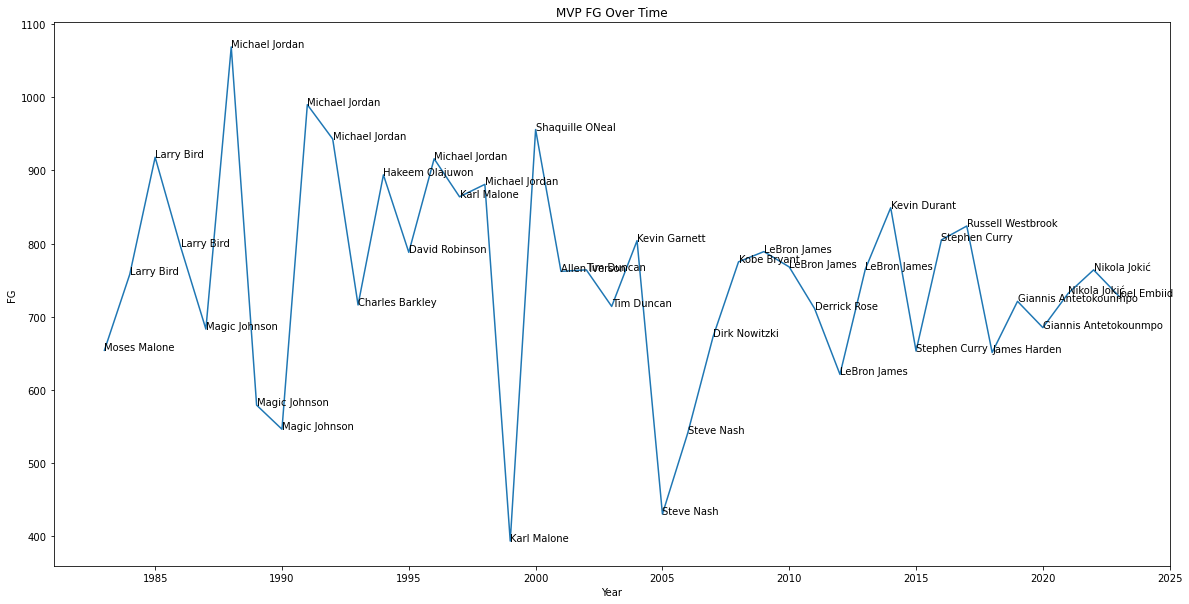

In [69]:
# Plot MVP performance on individual statistics over time

for metric in metrics_list:
    fig, ax = plt.subplots(figsize=(20, 10))
    x = df[df['Rank-MVP'] == 1.0]['Yr']
    y = df[df['Rank-MVP'] == 1.0][metric]
    val = df[df['Rank-MVP'] == 1.0]['Player']

    plt.plot(x, y)
    plt.title('MVP ' + metric +  ' Over Time')
    plt.xlabel('Year')
    plt.ylabel(metric)

    def label_point(x, y, val, ax):
        a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
        for i, point in a.iterrows():
            ax.text(point['x'], point['y'], str(point['val']))

    label_point(x, y, val, ax)

    plt.show()
    break

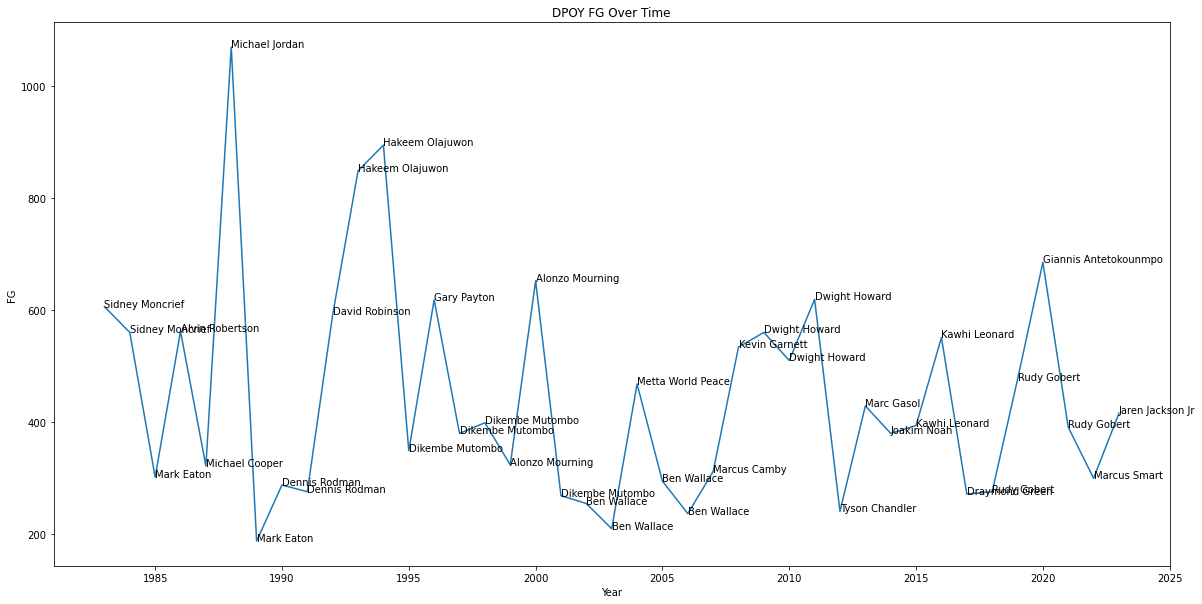

In [70]:
# Plot DPOY performance on individual statistics over time

for metric in metrics_list:
    fig, ax = plt.subplots(figsize=(20, 10))
    x = df[df['Rank-DPOY'] == 1.0]['Yr']
    y = df[df['Rank-DPOY'] == 1.0][metric]
    val = df[df['Rank-DPOY'] == 1.0]['Player']

    plt.plot(x, y)
    plt.title('DPOY ' + metric +  ' Over Time')
    plt.xlabel('Year')
    plt.ylabel(metric)

    def label_point(x, y, val, ax):
        a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
        for i, point in a.iterrows():
            ax.text(point['x'], point['y'], str(point['val']))

    label_point(x, y, val, ax)

    plt.show()
    break

I was able to make a few interesting observations from the above plots:
- Most MVPs in the last 40+ years have been offensive-oriented players with scoring as the standout offensive metrics
- MVP 3 point shooting has increased significantly in the last 10-15 years
- Magic Johnson, Steve Nash, and Russell Westbrook are the only MVPs in the last 40+ years with assists as a standout performance metric
- Most DPOYs in the last 40+ years have not been strong offensive players, with very few exceptions
- Most DPOYs in the last 40+ years have been big men (Centers, Power Forwards, Small Forwards)
- In the last 40+ years only 3 players have won MVP and DPOY (Michael Jordan, Hakeem Olajuwan, and Giannis Antetokounmpo)

Knowing that the MVP seems to be a largely offensive award, and that DPOY seems to be a largely defensive award, I next wanted to investigate per-season scatter plots to see how MVPs and DPOYs stacked up against the rest of the league in terms of team success compared to individual offensive / defensive prowess.

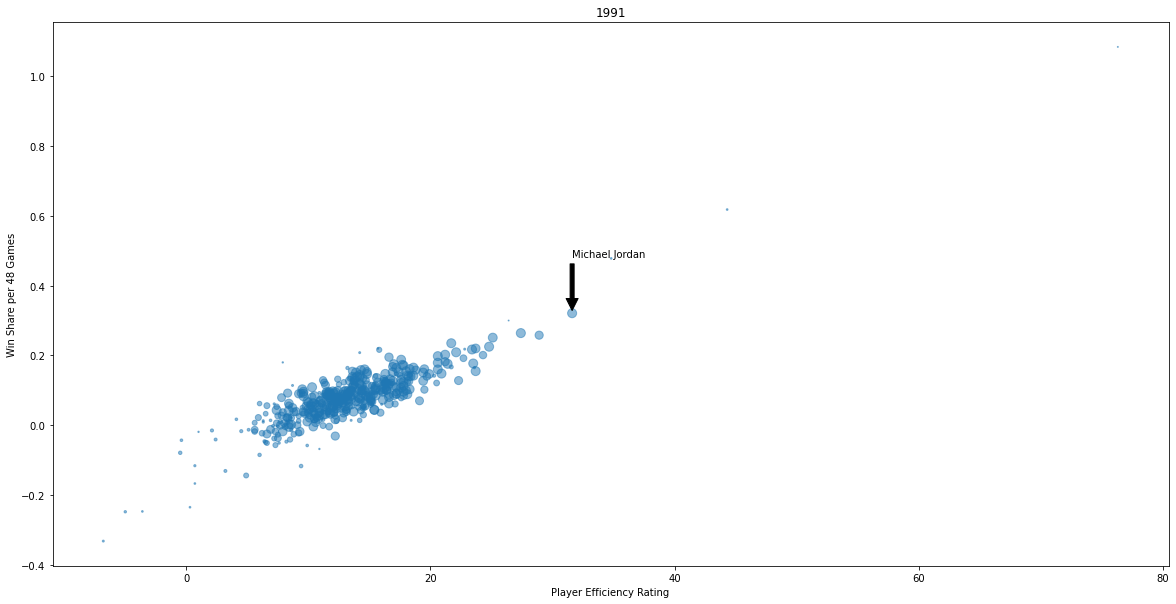

In [71]:
# Produce scatter plot for each season to isolate MVP from the rest of the competition

for year in years:
    
    fig, ax = plt.subplots(figsize=(20, 10))

    df_year = df[df['Yr'] == year.astype(int)]
    x = df_year['PER']
    y = df_year['WS/48']
    size = df_year['G']

    MVP = df_year[df_year['Rank-MVP'] == 1]

    ax.scatter(x, y, s = size, alpha=0.5)
    ax.annotate(list(MVP['Player'])[0], xy = (list(MVP['PER'])[0], list(MVP['WS/48'])[0]), xytext = (list(MVP['PER'])[0], list(MVP['WS/48'])[0] * 1.5), arrowprops=dict(facecolor='black', shrink=0.05))
    plt.xlabel('Player Efficiency Rating')
    plt.ylabel('Win Share per 48 Games')
    plt.title(year.astype(int))
    plt.show()
    break

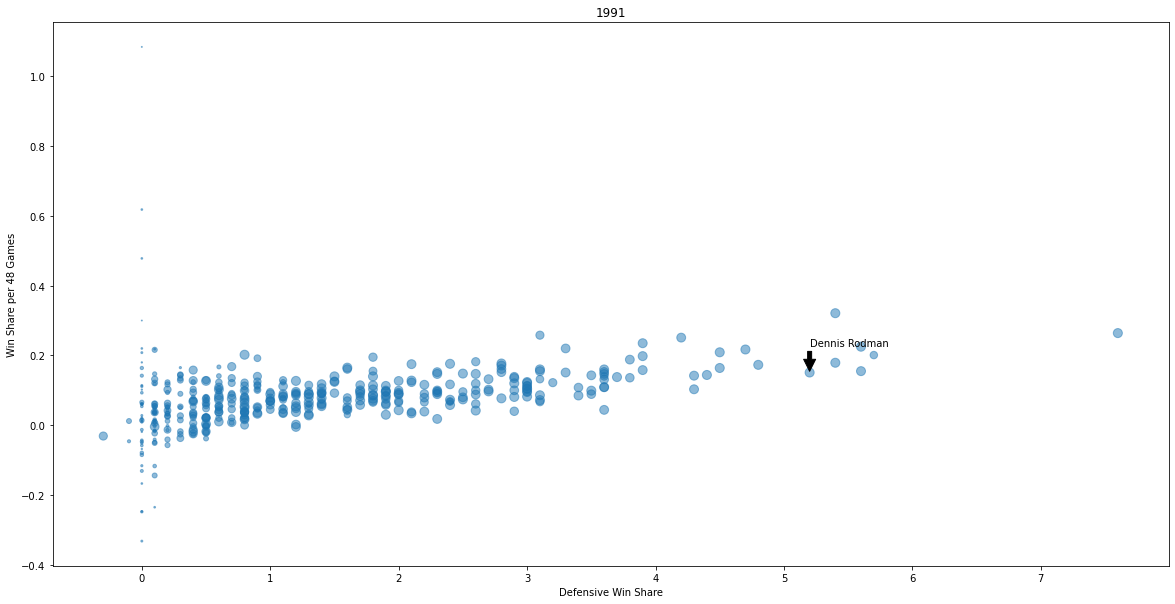

In [72]:
# Produce scatter plot for each season to isolate DPOY from the rest of the competition

for year in years:
    
    fig, ax = plt.subplots(figsize=(20, 10))

    df_year = df[df['Yr'] == year.astype(int)]
    x = df_year['DWS']
    y = df_year['WS/48']
    size = df_year['G']

    DPOY = df_year[df_year['Rank-DPOY'] == 1]

    ax.scatter(x, y, s = size, alpha=0.5)
    ax.annotate(list(DPOY['Player'])[0], xy = (list(DPOY['DWS'])[0], list(DPOY['WS/48'])[0]), xytext = (list(DPOY['DWS'])[0], list(DPOY['WS/48'])[0] * 1.5), arrowprops=dict(facecolor='black', shrink=0.05))
    plt.xlabel('Defensive Win Share')
    plt.ylabel('Win Share per 48 Games')
    plt.title(year.astype(int))
    plt.show()
    break


The above scatter plot analyses combine individual offensive / defensive prowess with team success as indications of individual contribution. As expected, a majority of MVPS and DPOYs were towards the top of either the X or Y axis, if not both. I would be interested to further investigate the players that performed better than the MVPs / DPOYs on one or both measures. My assumption is that those individuals were also in MVP / DPOY discussions that year.

I next plotted measures of central tendency to supplement my original time series statistical analysis. I am not only interested in comparing MVPs and DPOYs to each other over time for all statistics, but also in comparing MVPs and DPOYs to the rest of the field within a particular season.

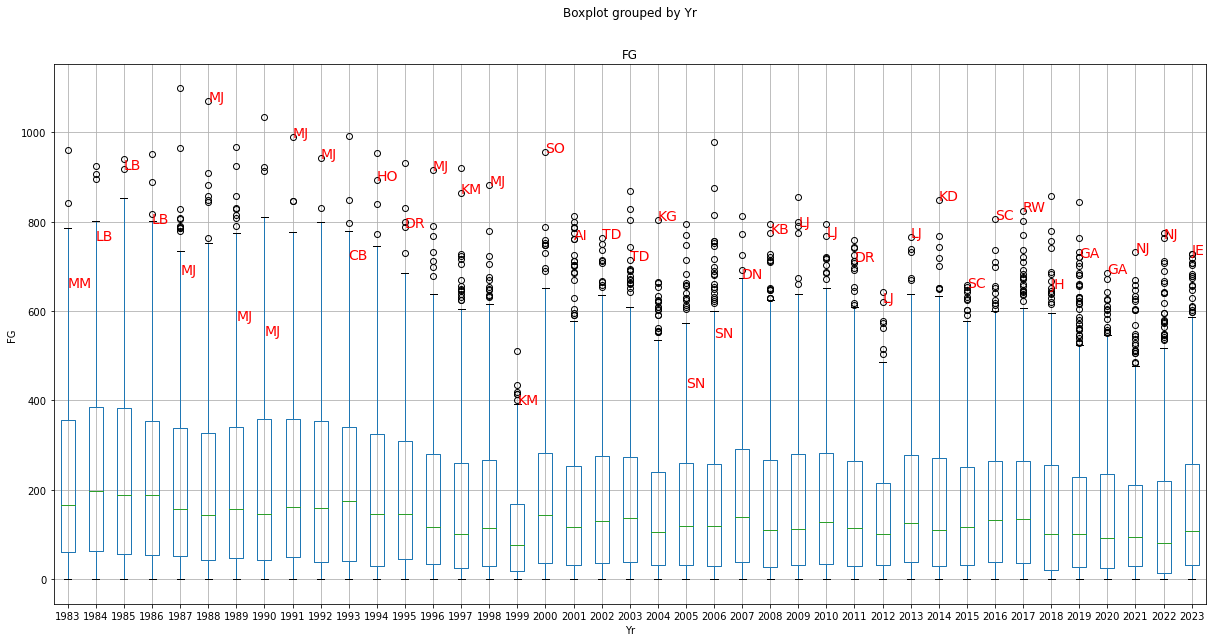

In [73]:
# Plot box-and-whiskers for each year and each statistic

for metric in metrics_list:

    fig, ax = plt.subplots(figsize = (20,10))
    df.boxplot(column = metric, by = 'Yr', ax = ax)

    MVPS = df[df['Rank-MVP'] == 1]
    years_list = list(MVPS['Yr'])
    year_range = list(range(1,len(MVPS) + 1))

    dictionary = {years_list[i]: year_range[i] for i in range(len(years_list))}

    def acronym(string):

        oupt = string[0]

        for i in range(1, len(string)):
            if string[i-1] == ' ':

                oupt += string[i]

        oupt = oupt.upper()
        return oupt

    for year in years_list:
        plt.annotate(acronym(list(df[(df['Yr'] == year) & (df['Rank-MVP'] == 1)]['Player'])[0]), 
                     xy=(dictionary[year], list(df[(df['Yr'] == year) & (df['Rank-MVP'] == 1)][metric])[0]), 
                     fontsize=14, 
                     color = 'red')
        
    ax.set_ylabel(metric)
    plt.show()
    break

I would like to supplement the above analysis by investigating instances where MVPs and DPOYs performed statistically worse than other players on key statistics i.e. win shares and PER to identify which players performed better and by how much - those would be cases where perhaps some non-objective criteria came into play. I will find out which statistics are most important to predicting MVP and DPOY from my modeling process and look into those fields.

# Modeling

## Baseline Model - Decision Tree Classifier

I used a Decision Tree Classifier for my baseline model. From there I iterated to Random Forest Classifiers and also tested hyperparameter tuning to see how much of an impact that had on model performance. I also started with multi-class target variables and then tested binary target variables to see how that impacted model performance.

Since I treated this as a classification problem, I first needed to create a categorical target variable consisting of the following values:
- Won
- Received Votes
- Received No Votes

In [71]:
# Define function to create new categorical MVP target variable

def label_MVP(row):
    if row['Rank-MVP'] == 1.0:
        return 'Won'
    if row['Rank-MVP'] > 1.0:
        return 'Received Votes'
    if row['Rank-MVP'] == 0.0:
        return 'Received No Votes'

In [72]:
# Make two copies of dataframe - one to use for each model (MVP predictions vs. DPOY predictions)

df_mvp = df
df_dpoy = df

In [73]:
# Create new categorical MVP target variable

df_mvp['Category_MVP'] = df_dpoy.apply(lambda row: label_MVP(row), axis=1)

In [74]:
df_mvp[df_mvp['Category_MVP'] == 'Won']

,Yr,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,First-MVP,Pts Won-MVP,Pts Max-MVP,Share-MVP,Rank-DPOY,First-DPOY,Pts won-DPOY,Pts Max-DPOY,Share-DPOY,Category_MVP
17324,1983,Moses Malone,C,27,PHI,78,78.0,2922,654,1305,...,69.0,720.0,750.0,0.960,0.0,0.0,0.0,0.0,0.000,Won
17493,1984,Larry Bird,PF,27,BOS,79,77.0,3028,758,1542,...,52.0,652.0,760.0,0.858,12.0,1.0,1.0,76.0,0.013,Won
17821,1985,Larry Bird,SF,28,BOS,80,77.0,3161,918,1760,...,73.0,763.0,780.0,0.978,0.0,0.0,0.0,0.0,0.000,Won
18165,1986,Larry Bird,SF,29,BOS,82,81.0,3113,796,1606,...,73.0,765.0,780.0,0.981,0.0,0.0,0.0,0.0,0.000,Won
18647,1987,Magic Johnson,PG,27,LAL,80,80.0,2904,683,1308,...,65.0,733.0,780.0,0.940,0.0,0.0,0.0,0.0,0.000,Won
19026,1988,Michael Jordan,SG,24,CHI,82,82.0,3311,1069,1998,...,47.0,665.0,800.0,0.831,1.0,37.0,37.0,80.0,0.463,Won
19403,1989,Magic Johnson,PG,29,LAL,77,77.0,2886,579,1137,...,42.5,664.5,850.0,0.782,0.0,0.0,0.0,0.0,0.000,Won
19809,1990,Magic Johnson,PG,30,LAL,79,79.0,2937,546,1138,...,27.0,636.0,920.0,0.691,0.0,0.0,0.0,0.0,0.000,Won
190,1991,Michael Jordan,SG,27,CHI,82,82.0,3034,990,1837,...,77.0,891.0,960.0,0.928,9.0,1.0,1.0,96.0,0.010,Won
614,1992,Michael Jordan,SG,28,CHI,80,80.0,3102,943,1818,...,80.0,900.0,960.0,0.938,3.0,3.0,3.0,96.0,0.031,Won


In [75]:
# Define function to create new categorical DPOY target variable

def label_DPOY(row):
    if row['Rank-DPOY'] == 1.0:
        return 'Won'
    if row['Rank-DPOY'] > 1.0:
        return 'Received Votes'
    if row['Rank-DPOY'] == 0.0:
        return 'Received No Votes'

In [76]:
# Create new categorical DPOY target variable

df_dpoy['Category_DPOY'] = df_dpoy.apply(lambda row: label_DPOY(row), axis=1)

In [77]:
df_dpoy[df_dpoy['Category_DPOY'] == 'Won']

,Yr,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Pts Won-MVP,Pts Max-MVP,Share-MVP,Rank-DPOY,First-DPOY,Pts won-DPOY,Pts Max-DPOY,Share-DPOY,Category_MVP,Category_DPOY
17342,1983,Sidney Moncrief,SG,25,MIL,76,76.0,2710,606,1156,...,226.0,750.0,0.301,1.0,14.0,14.0,75.0,0.187,Received Votes,Won
17679,1984,Sidney Moncrief,SG,26,MIL,79,79.0,3075,560,1125,...,70.0,760.0,0.092,1.0,19.0,19.0,76.0,0.250,Received Votes,Won
17882,1985,Mark Eaton,C,28,UTA,82,82.0,2813,302,673,...,4.0,780.0,0.005,1.0,32.0,32.0,78.0,0.410,Received Votes,Won
18399,1986,Alvin Robertson,SG,23,SAS,82,82.0,2878,562,1093,...,3.0,780.0,0.004,1.0,27.0,27.0,78.0,0.346,Received Votes,Won
18556,1987,Michael Cooper,SG,30,LAL,82,2.0,2253,322,736,...,0.0,0.0,0.000,1.0,25.0,25.0,78.0,0.321,Received No Votes,Won
19026,1988,Michael Jordan,SG,24,CHI,82,82.0,3311,1069,1998,...,665.0,800.0,0.831,1.0,37.0,37.0,80.0,0.463,Won,Won
19332,1989,Mark Eaton,C,32,UTA,82,82.0,2914,188,407,...,3.0,850.0,0.004,1.0,26.0,26.0,85.0,0.306,Received Votes,Won
19945,1990,Dennis Rodman,SF,28,DET,82,43.0,2377,288,496,...,0.0,0.0,0.000,1.0,49.0,49.0,92.0,0.533,Received No Votes,Won
312,1991,Dennis Rodman,SF,29,DET,82,77.0,2747,276,560,...,0.0,0.0,0.000,1.0,51.0,51.0,96.0,0.531,Received No Votes,Won
739,1992,David Robinson,C,26,SAS,68,68.0,2564,592,1074,...,337.0,960.0,0.351,1.0,46.0,46.0,96.0,0.479,Received Votes,Won


Before I started actually building models, I was interested to see which features were most highly correlated with my target variable. I used MVP and DPOY Share for this analysis since those are more precise, numerical representations of the categories I created.

In [78]:
# Isolate numerical columns

cols = df_mvp.columns
num_cols = df_mvp._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

In [79]:
# Calculate correlation to MVP Share and show top 10 most highly correlated

df_mvp.drop(['Share-MVP'] + cat_cols,  axis=1).apply(lambda x: x.corr(df_mvp['Share-MVP'])).sort_values(ascending = False)[0:10]

Pts Won-MVP    0.987947
First-MVP      0.829836
Pts Max-MVP    0.521493
VORP           0.469876
OWS            0.387916
WS             0.379182
FT             0.339812
FTA            0.337982
FTApergame     0.312394
FTpergame      0.311746
dtype: float64

In [80]:
# Calculate correlation to DPOY Share and show top 10 most highly correlated

df_dpoy.drop(['Share-DPOY'] + cat_cols,  axis=1).apply(lambda x: x.corr(df_dpoy['Share-DPOY'])).sort_values(ascending = False)[0:10]

First-DPOY      0.952966
Pts won-DPOY    0.905946
Pts Max-DPOY    0.408759
BLK             0.279491
DWS             0.270807
BLKpergame      0.247438
Pts Max-MVP     0.237134
Pts Won-MVP     0.229214
VORP            0.228281
Share-MVP       0.226070
dtype: float64

Ignoring the first 3 features for each of the above lists (since those are part of the same voting dataset) it seems that VORP, OWS, and WS are the top 3 most highly-correlated to MVP vote share. It seems that BLK, DWS, and BLKpergame are the top 3 most highly-correlated features to DPOY vote share. Interestingly, it seems that MVP votes are also somewhat correlated to DPOY votes.

With the following steps I built my baseline DTC model.

In [81]:
# Train test split for MVP category predictions

y = df_mvp['Category_MVP']
X = df_mvp.drop(columns = ['Category_MVP','joinkey','joinkey2','joinkey3','Team','GB','Player',
                      'Rank-MVP','First-MVP','Pts Won-MVP','Pts Max-MVP','Share-MVP','Rank-DPOY',
                      'First-DPOY','Pts won-DPOY','Pts Max-DPOY','Share-DPOY','Category_DPOY','Yr'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [82]:
# Pre-Processing (Train)

ohe = OneHotEncoder(drop = 'first', handle_unknown = 'error')
train_feature_array = ohe.fit_transform(X_train[['Losing_season','Tm','Playoffs','Pos']]).toarray()
train_feature_labels = ohe.categories_

train_categoricals = [{'Losing_season':0},{'Tm':1},{'Playoffs':2},{'Pos':3}]

train_new_labels = []

for dict_ in train_categoricals:
    for key, value in dict_.items():
        for item in list(train_feature_labels[value]):
            if list(train_feature_labels[value]).index(item) == 0:
                continue
            else:
                train_new_labels.append(str(item) + '_' + key)
                

train_DF = pd.DataFrame(train_feature_array, columns = train_new_labels)

X_train.reset_index(drop = True, inplace = True)

combined_X_train = pd.concat([X_train, train_DF], axis = 1)
X_train_OHE = combined_X_train.drop(columns = ['Losing_season','Tm','Playoffs','Pos'])

X_train_OHE

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,TOR_Tm,UTA_Tm,VAN_Tm,WAS_Tm,WSB_Tm,Y_Playoffs,PF_Pos,PG_Pos,SF_Pos,SG_Pos
0,23,48,0.0,265,19,71,0.268,3,15,0.200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,25,37,8.0,711,97,241,0.402,28,78,0.359,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,33,77,3.0,1747,227,524,0.433,3,28,0.107,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,28,72,72.0,2551,651,1449,0.449,265,722,0.367,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,32,81,81.0,2240,94,185,0.508,0,0,0.000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16039,26,35,13.0,624,64,111,0.577,0,0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16040,37,20,14.0,366,34,62,0.548,2,9,0.222,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16041,23,9,0.0,96,10,28,0.357,3,13,0.231,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
16042,30,81,81.0,2647,501,1066,0.470,74,232,0.319,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [83]:
# Pre-Processing (Test)

ohe = OneHotEncoder(drop = 'first', handle_unknown = 'error')
test_feature_array = ohe.fit_transform(X_test[['Losing_season','Tm','Playoffs','Pos']]).toarray()
test_feature_labels = ohe.categories_

test_categoricals = [{'Losing_season':0},{'Tm':1},{'Playoffs':2},{'Pos':3}]

test_new_labels = []

for dict_ in test_categoricals:
    for key, value in dict_.items():
        for item in list(test_feature_labels[value]):
            if list(test_feature_labels[value]).index(item) == 0:
                continue
            else:
                test_new_labels.append(str(item) + '_' + key)
                

test_DF = pd.DataFrame(test_feature_array, columns = test_new_labels)

X_test.reset_index(drop = True, inplace = True)

combined_X_test = pd.concat([X_test, test_DF], axis = 1)
X_test_OHE = combined_X_test.drop(columns = ['Losing_season','Tm','Playoffs','Pos'])

X_test_OHE

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,TOR_Tm,UTA_Tm,VAN_Tm,WAS_Tm,WSB_Tm,Y_Playoffs,PF_Pos,PG_Pos,SF_Pos,SG_Pos
0,32,50,5.0,461,41,111,0.369,0,6,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,28,62,21.0,834,114,236,0.483,1,4,0.250,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,23,16,0.0,227,41,105,0.390,0,7,0.000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,24,72,54.0,2497,496,1096,0.453,127,364,0.349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,65,1.0,1190,151,356,0.424,56,177,0.316,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007,30,14,6.0,158,15,30,0.500,0,1,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4008,24,77,10.0,1528,268,571,0.469,1,4,0.250,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4009,22,14,1.0,79,6,24,0.250,2,12,0.167,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4010,26,75,71.0,2578,508,1058,0.480,22,55,0.400,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [84]:
# Fit a baseline Decision Tree Classifier model

DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
DTC.fit(X_train_OHE, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [85]:
# Make predictions on the training set

y_pred_train = DTC.predict(X_train_OHE)
print('Train Accuracy Score:',balanced_accuracy_score(y_train, y_pred_train))
y_pred_train_proba = DTC.predict_proba(X_train_OHE)
print('Train AUC Score:', roc_auc_score(y_train, y_pred_train_proba, multi_class = 'ovr'))

# Make predictions on the test set

y_pred_test = DTC.predict(X_test_OHE)
print('Test Accuracy Score:', balanced_accuracy_score(y_test, y_pred_test))
y_pred_test_proba = DTC.predict_proba(X_test_OHE)
print('Test AUC Score:', roc_auc_score(y_test, y_pred_test_proba, multi_class = 'ovr'))

Train Accuracy Score: 1.0
Train AUC Score: 1.0
Test Accuracy Score: 0.6473888426237124
Test AUC Score: 0.7672508219853239


In [86]:
# Check classification report for train set

print('Train:')
print(classification_report(y_train, y_pred_train))

# Check classification report for test set

print('Test:')
print(classification_report(y_test, y_pred_test))

Train:
                   precision    recall  f1-score   support

Received No Votes       1.00      1.00      1.00     15527
   Received Votes       1.00      1.00      1.00       490
              Won       1.00      1.00      1.00        27

         accuracy                           1.00     16044
        macro avg       1.00      1.00      1.00     16044
     weighted avg       1.00      1.00      1.00     16044

Test:
                   precision    recall  f1-score   support

Received No Votes       0.99      0.99      0.99      3891
   Received Votes       0.53      0.60      0.56       107
              Won       0.42      0.36      0.38        14

         accuracy                           0.97      4012
        macro avg       0.65      0.65      0.64      4012
     weighted avg       0.98      0.97      0.97      4012



The classification reports above indicate that the baseline model performed perfectly on the train set, but much worse on the test set. This would suggest some level of overfitting to the training data.

Also taking a closer look at the classification report for the test set, I noticed that performance on the majority class (Received No Votes) was much better than performance on the minority classes (Received Votes and Won). In order to address this class imbalance I next performed SMOTE resampling on the train set.

In [87]:
## Perform SMOTE resampling on the train set

print(y_train.value_counts())

X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train_OHE, y_train)

print(pd.Series(y_train_resampled).value_counts())

Received No Votes    15527
Received Votes         490
Won                     27
Name: Category_MVP, dtype: int64
Received No Votes    15527
Won                  15527
Received Votes       15527
Name: Category_MVP, dtype: int64


In [88]:
# Fit a new model on the resampled train set, make predictions on the train and test sets

DTC2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
DTC2.fit(X_train_resampled, y_train_resampled)

y_pred_train_2 = DTC2.predict(X_train_resampled)
y_pred_test_2 = DTC2.predict(X_test_OHE)

In [89]:
# Check to see how train scores have been impacted

print(classification_report(y_train_resampled, y_pred_train_2))

                   precision    recall  f1-score   support

Received No Votes       1.00      1.00      1.00     15527
   Received Votes       1.00      1.00      1.00     15527
              Won       1.00      1.00      1.00     15527

         accuracy                           1.00     46581
        macro avg       1.00      1.00      1.00     46581
     weighted avg       1.00      1.00      1.00     46581



In [90]:
# Check to see how test scores have been impacted

print(classification_report(y_test, y_pred_test_2))

                   precision    recall  f1-score   support

Received No Votes       0.99      0.98      0.99      3891
   Received Votes       0.49      0.70      0.58       107
              Won       0.69      0.64      0.67        14

         accuracy                           0.97      4012
        macro avg       0.73      0.78      0.74      4012
     weighted avg       0.98      0.97      0.97      4012



It looks like resampling improved model performance. Next I looked into hyperparameter tuning to address overfitting to the train set.

In [91]:
## Function for tuning hyperparameters to adjust for overfitting - DTC

def hyper_param_tuning_DTC(feature, feature_range):
    
    train_AUC_results_total = []
    test_AUC_results_total = []
    train_accuracy_results_total = []
    test_accuracy_results_total = []
    
    for value in feature_range:
        if feature == 'max_depth':
            DTC = DecisionTreeClassifier(max_depth = value, random_state = 1)
        elif feature == 'max_features':
            DTC = DecisionTreeClassifier(max_features = value, random_state = 1)
        elif feature == 'criterion':
            DTC = DecisionTreeClassifier(criterion = value, random_state = 1)
        elif feature == 'min_samples_leaf':
            DTC = DecisionTreeClassifier(min_samples_leaf = value, random_state = 1)
        elif feature == 'min_samples_split':
            DTC = DecisionTreeClassifier(min_samples_split = value, random_state = 1)

        DTC.fit(X_train_resampled, y_train_resampled)
        y_pred_train_proba = DTC.predict_proba(X_train_resampled)
        roc_auc_train = roc_auc_score(y_train_resampled, y_pred_train_proba, multi_class = 'ovr')
        y_pred_train = DTC.predict(X_train_resampled)
        train_accuracy = accuracy_score(y_train_resampled, y_pred_train)

        y_pred_test_proba = DTC.predict_proba(X_test_OHE)
        roc_auc_test = roc_auc_score(y_test, y_pred_test_proba, multi_class = 'ovr')
        y_pred_test = DTC.predict(X_test_OHE)
        test_accuracy = accuracy_score(y_test, y_pred_test)

        scores = {'Train AUC': roc_auc_train, 
        'Train Accuracy' : train_accuracy, 
        'Test AUC' : roc_auc_test, 
        'Test Accuracy' : test_accuracy}

        train_AUC_results_total.append(scores['Train AUC'])
        test_AUC_results_total.append(scores['Test AUC'])
        train_accuracy_results_total.append(scores['Train Accuracy'])
        test_accuracy_results_total.append(scores['Test Accuracy'])
    
    
            
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (24,8))

    ax1.plot(feature_range, train_AUC_results_total, 'b', label='Train AUC')
    ax1.plot(feature_range, test_AUC_results_total, 'r', label='Test AUC')
    ax1.set_ylabel('AUC Score')
    ax1.set_xlabel(feature)
    ax1.set_title('DTC - AUC vs.' + feature)
    ax1.legend()

    ax2.plot(feature_range, train_accuracy_results_total, 'b', label='Train Accuracy')
    ax2.plot(feature_range, test_accuracy_results_total, 'r', label='Test Accuracy')
    ax2.set_ylabel('Accuracy Score')
    ax2.set_xlabel(feature)
    ax2.set_title('DTC - Accuracy vs.' + feature)
    ax2.legend()

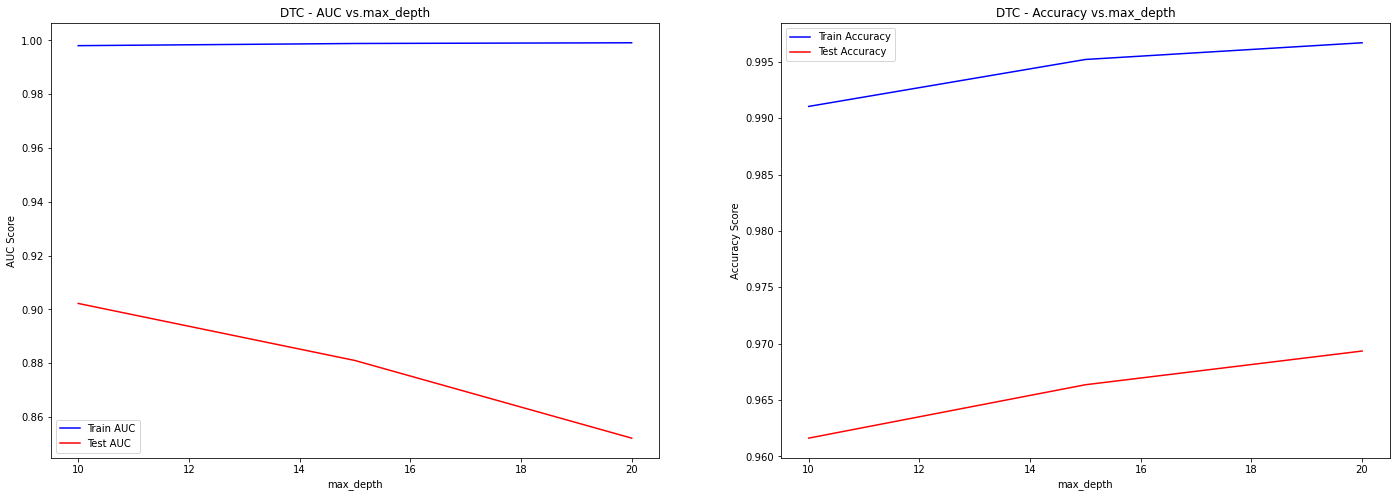

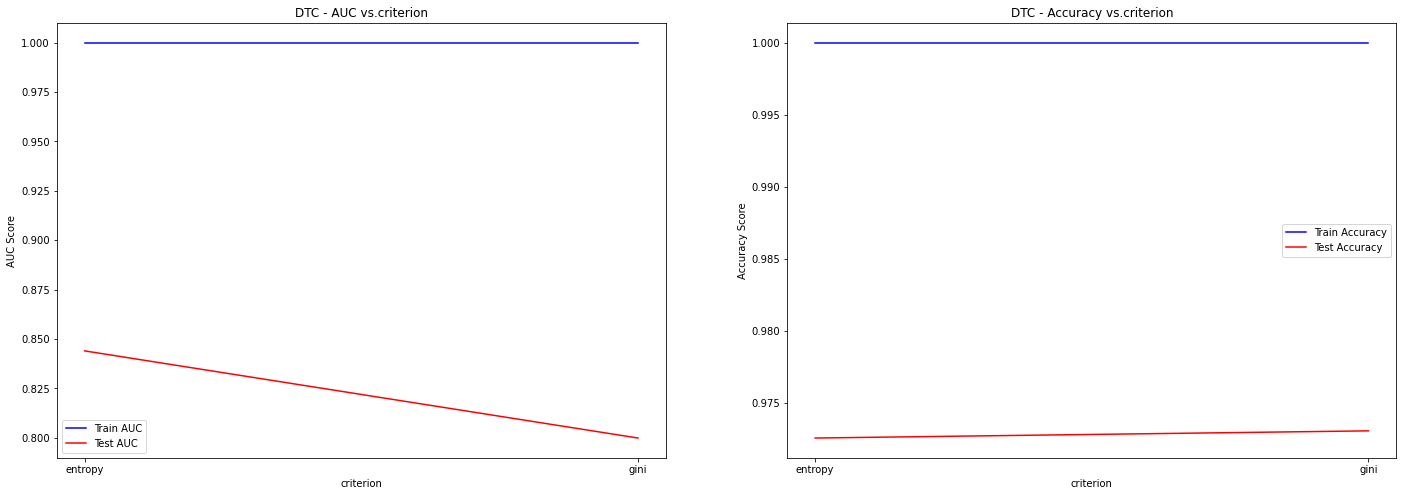

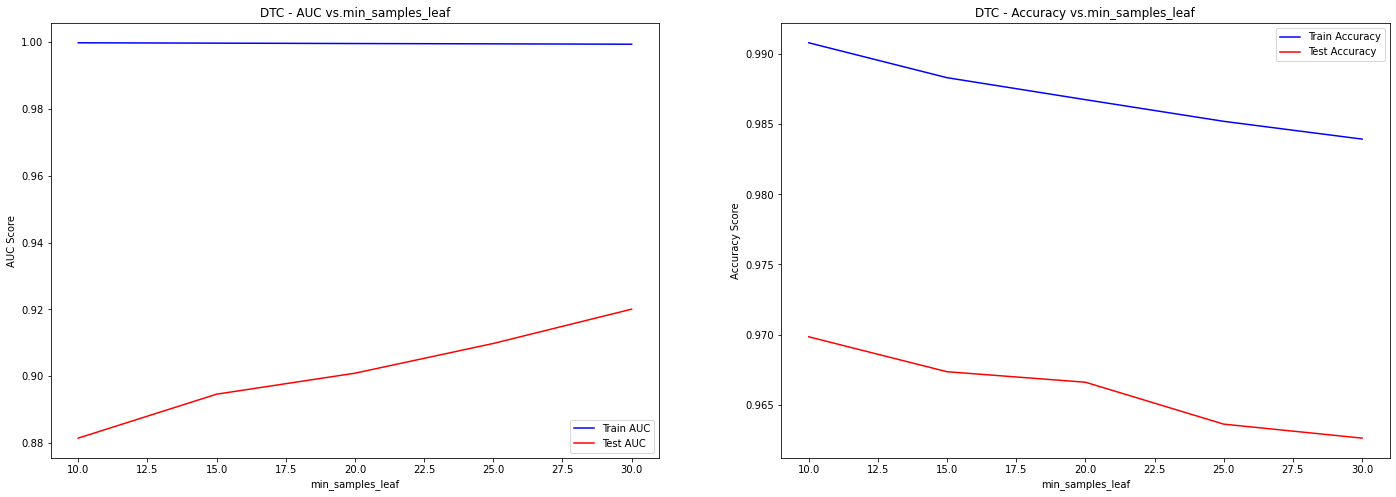

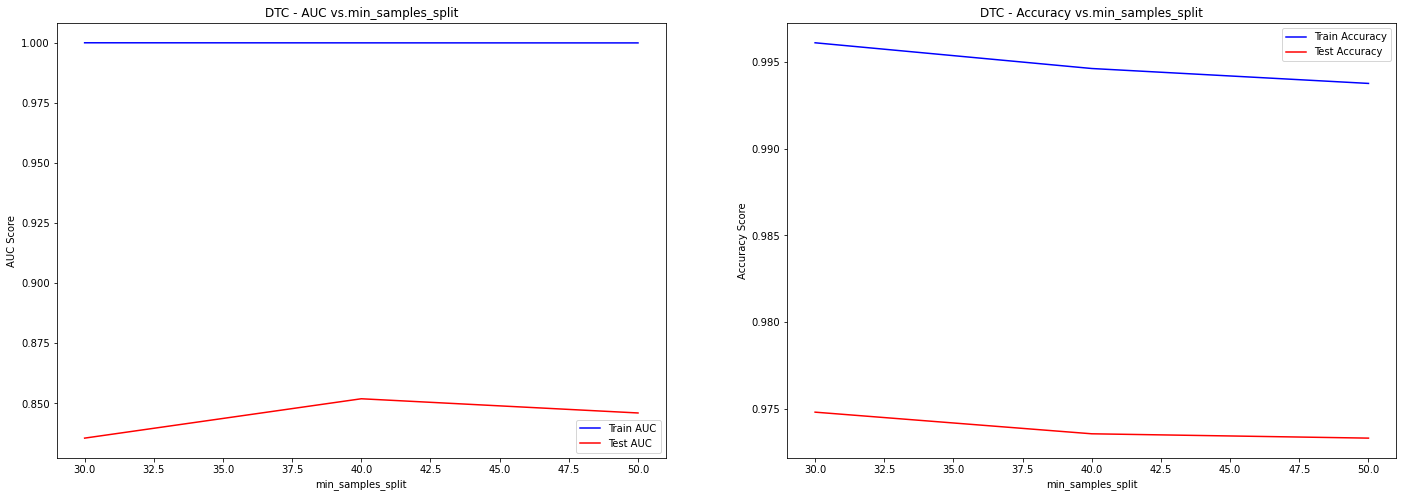

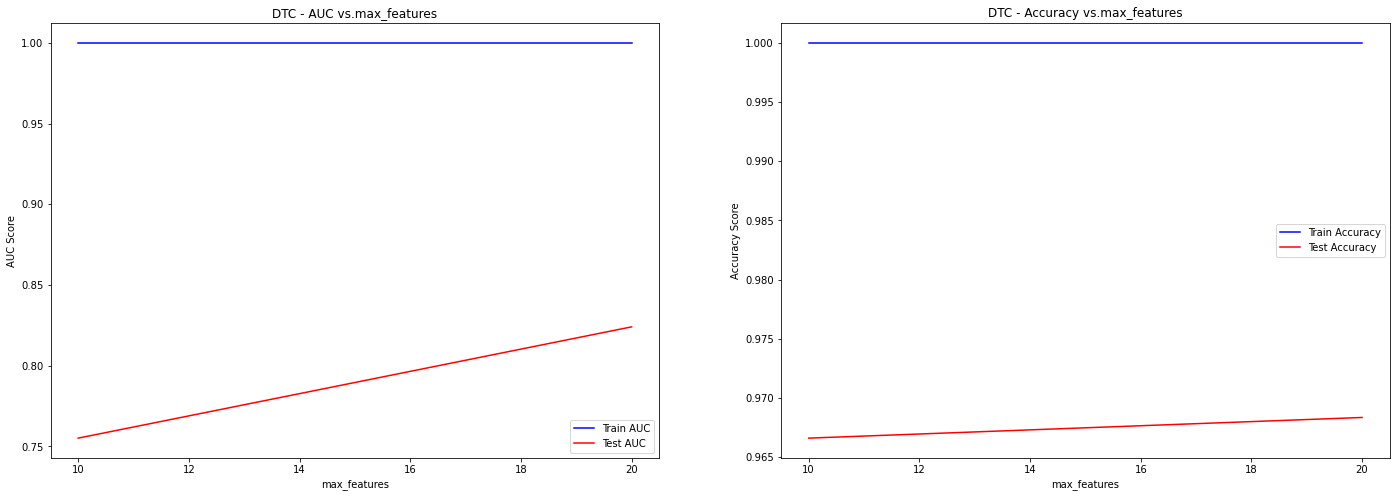

In [92]:
hyper_params = [{'max_depth' : [10,15,20]},
                {'criterion' : ['entropy','gini']}, 
                {'min_samples_leaf' : [10,15,20,25,30]}, 
                {'min_samples_split' : [30,40,50]}, 
                {'max_features' : [10,20]}]

# Tuning each hyperparamter individually

for parameter in hyper_params:
    hyper_param_tuning_DTC(list(parameter.keys())[0], parameter[list(parameter.keys())[0]])

In [ ]:
# Set up GridSearchCV with optimal hyper parameter value ranges

clf = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [14, 15, 16],
    'min_samples_split': [40, 45, 50],
    'min_samples_leaf': [20, 30, 40],
    'max_features': [10, 15]

}

gs_tree = GridSearchCV(clf, param_grid, cv=3)
gs_tree.fit(X_train_resampled, y_train_resampled)

gs_tree.best_params_

In [91]:
# Using the GridSearchCV results, fit the optimal model on training data

DTC_best = DecisionTreeClassifier(criterion = 'entropy', 
                                  max_depth = 16, 
                                  min_samples_split = 50, 
                                  min_samples_leaf = 20, 
                                  max_features = 15,
                                  random_state = 1)
DTC_best.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=16, max_features=15,
                       min_samples_leaf=20, min_samples_split=50,
                       random_state=1)

In [92]:
# Look at model performance on train data
y_pred_train_best = DTC_best.predict(X_train_resampled)
print('Train:')
print(classification_report(y_train_resampled, y_pred_train_best))

# Look at model performance on test data
y_pred_test_best = DTC_best.predict(X_test_OHE)
print('Test:')
print(classification_report(y_test, y_pred_test_best))

Train:
                   precision    recall  f1-score   support

Received No Votes       0.99      0.97      0.98     15527
   Received Votes       0.97      0.98      0.97     15527
              Won       0.99      1.00      1.00     15527

         accuracy                           0.98     46581
        macro avg       0.98      0.98      0.98     46581
     weighted avg       0.98      0.98      0.98     46581

Test:
                   precision    recall  f1-score   support

Received No Votes       1.00      0.96      0.98      3891
   Received Votes       0.36      0.79      0.50       107
              Won       0.62      0.71      0.67        14

         accuracy                           0.96      4012
        macro avg       0.66      0.82      0.71      4012
     weighted avg       0.98      0.96      0.96      4012



The above results indicate that the hyperparameter-tuned DTC model did a better job at generalizing. We can see that train performance went down, however test performance improved slightly.

From here I wanted to further iterate and test out Random Forest Classifiers to compare performance to my baseline and tuned DTC.

## Model V2 - Baseline Random Forest

In [94]:
# Build baseline Random Forest Classifier

forest = RandomForestClassifier(n_estimators = 100, random_state = 1)
forest.fit(X_train_OHE, y_train)

RandomForestClassifier(random_state=1)

In [95]:
forest.score(X_train_OHE, y_train)

1.0

In [96]:
forest.score(X_test_OHE, y_test)

0.9833000997008973

In [97]:
## Function for tuning hyperparameters to adjust for overfitting - RFC

def hyper_param_tuning_RFC(feature, feature_range):
    
    train_AUC_results_total = []
    test_AUC_results_total = []
    train_accuracy_results_total = []
    test_accuracy_results_total = []
    
    for value in feature_range:
        if feature == 'max_depth':
            RFC = RandomForestClassifier(max_depth = value, random_state = 1)
        elif feature == 'max_features':
            RFC = RandomForestClassifier(max_features = value, random_state = 1)
        elif feature == 'criterion':
            RFC = RandomForestClassifier(criterion = value, random_state = 1)
        elif feature == 'min_samples_leaf':
            RFC = RandomForestClassifier(min_samples_leaf = value, random_state = 1)
        elif feature == 'min_samples_split':
            RFC = RandomForestClassifier(min_samples_split = value, random_state = 1)

        RFC.fit(X_train_resampled, y_train_resampled)
        y_pred_train_proba = RFC.predict_proba(X_train_resampled)
        roc_auc_train = roc_auc_score(y_train_resampled, y_pred_train_proba, multi_class = 'ovr')
        y_pred_train = RFC.predict(X_train_resampled)
        train_accuracy = accuracy_score(y_train_resampled, y_pred_train)

        y_pred_test_proba = RFC.predict_proba(X_test_OHE)
        roc_auc_test = roc_auc_score(y_test, y_pred_test_proba, multi_class = 'ovr')
        y_pred_test = RFC.predict(X_test_OHE)
        test_accuracy = accuracy_score(y_test, y_pred_test)

        scores = {'Train AUC': roc_auc_train, 
        'Train Accuracy' : train_accuracy, 
        'Test AUC' : roc_auc_test, 
        'Test Accuracy' : test_accuracy}

        train_AUC_results_total.append(scores['Train AUC'])
        test_AUC_results_total.append(scores['Test AUC'])
        train_accuracy_results_total.append(scores['Train Accuracy'])
        test_accuracy_results_total.append(scores['Test Accuracy'])
    
    
            
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (24,8))

    ax1.plot(feature_range, train_AUC_results_total, 'b', label='Train AUC')
    ax1.plot(feature_range, test_AUC_results_total, 'r', label='Test AUC')
    ax1.set_ylabel('AUC Score')
    ax1.set_xlabel(feature)
    ax1.set_title('DTC - AUC vs.' + feature)
    ax1.legend()

    ax2.plot(feature_range, train_accuracy_results_total, 'b', label='Train Accuracy')
    ax2.plot(feature_range, test_accuracy_results_total, 'r', label='Test Accuracy')
    ax2.set_ylabel('Accuracy Score')
    ax2.set_xlabel(feature)
    ax2.set_title('DTC - Accuracy vs.' + feature)
    ax2.legend()

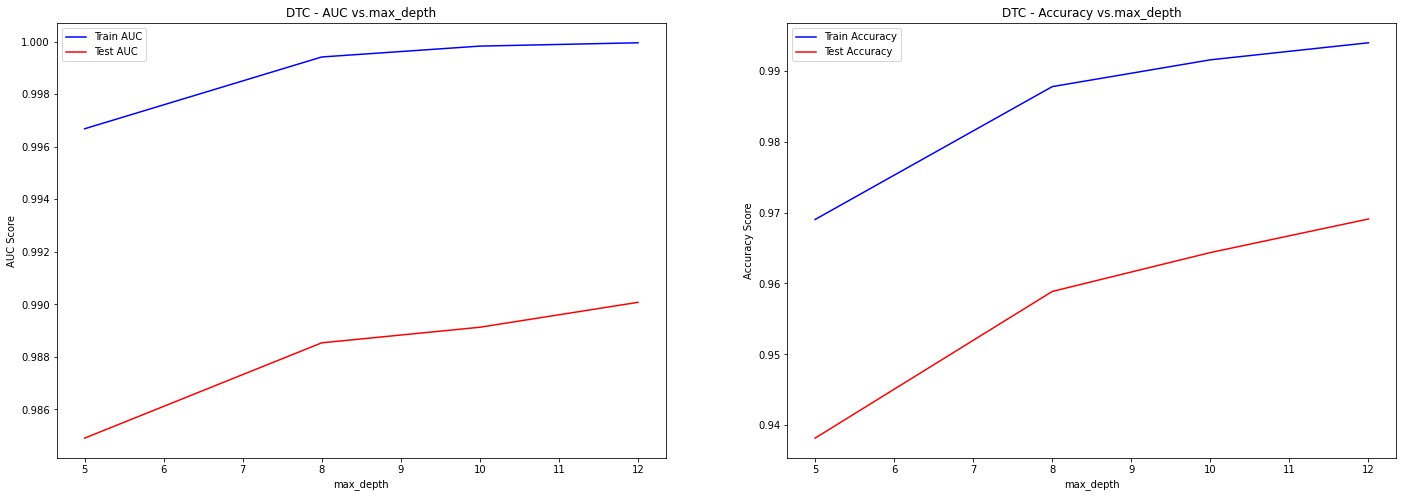

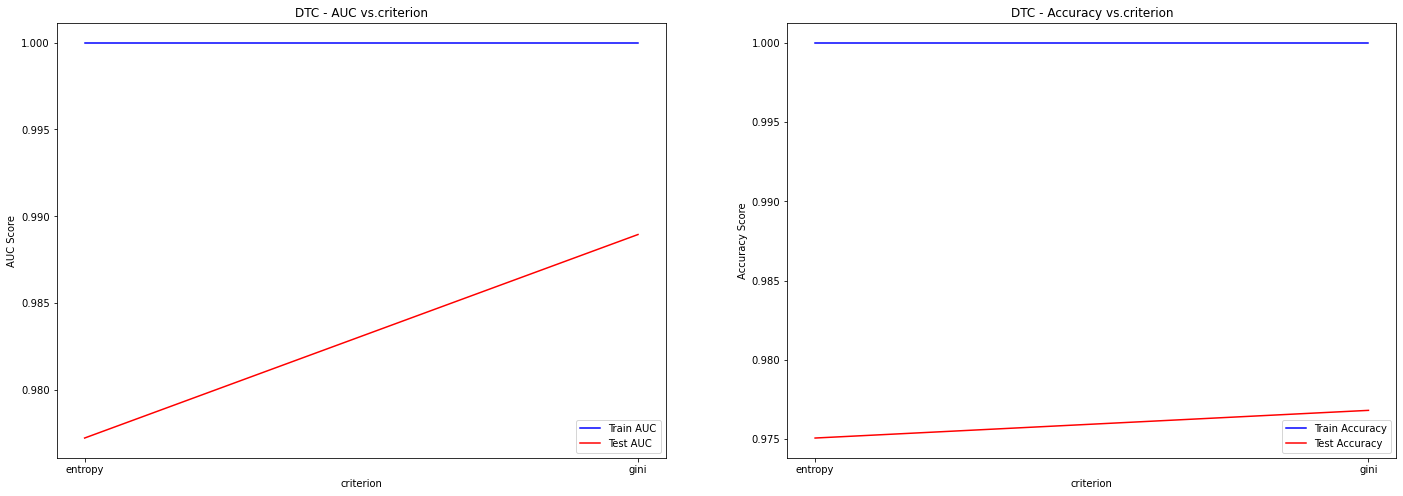

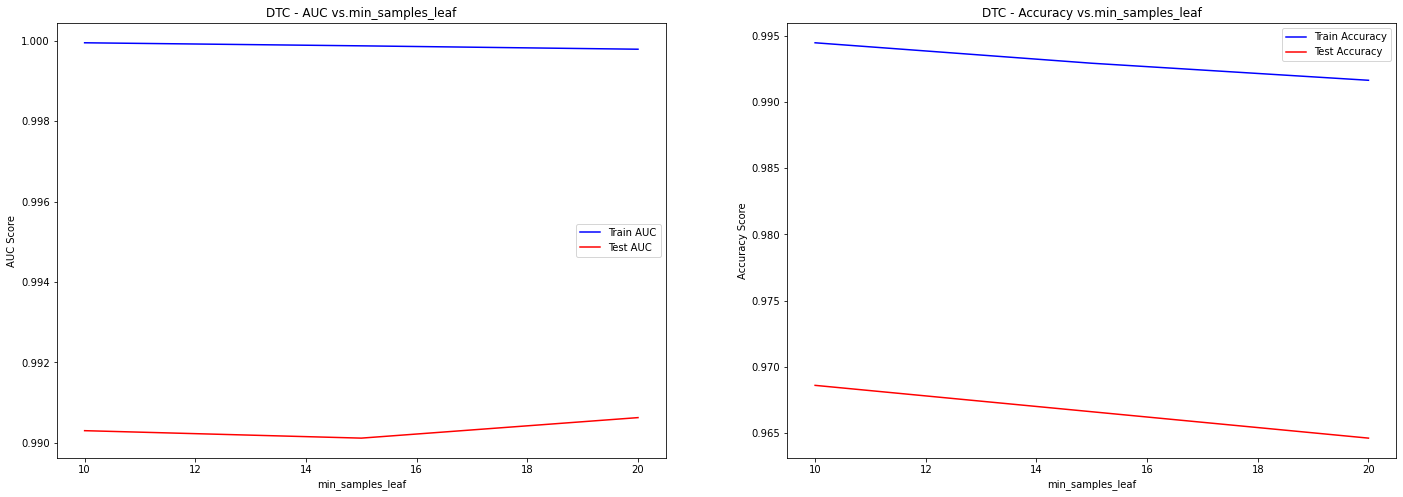

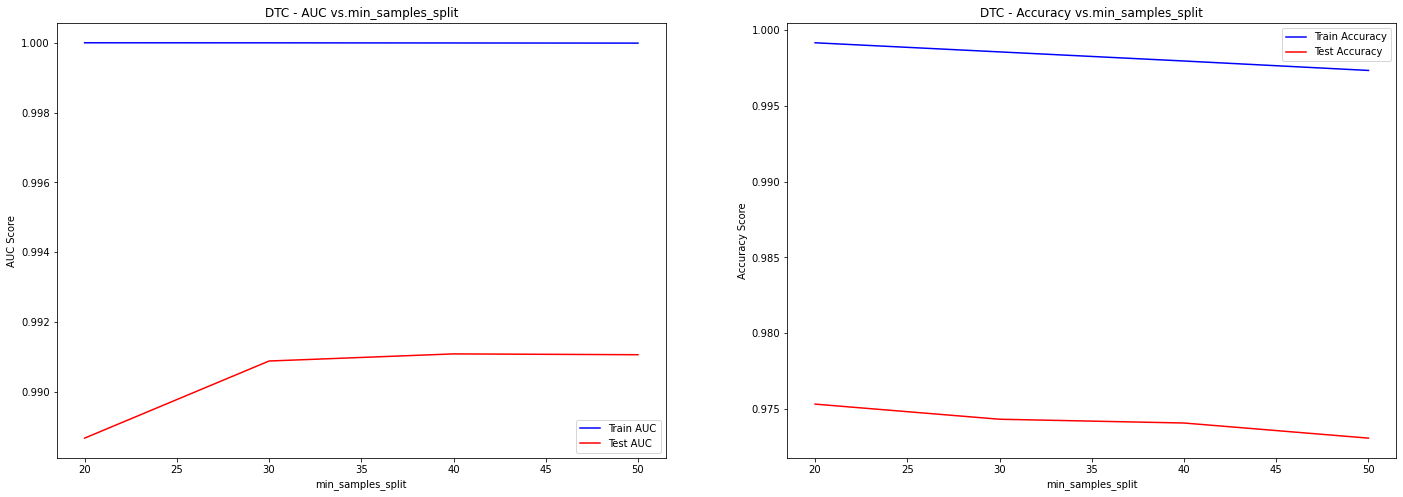

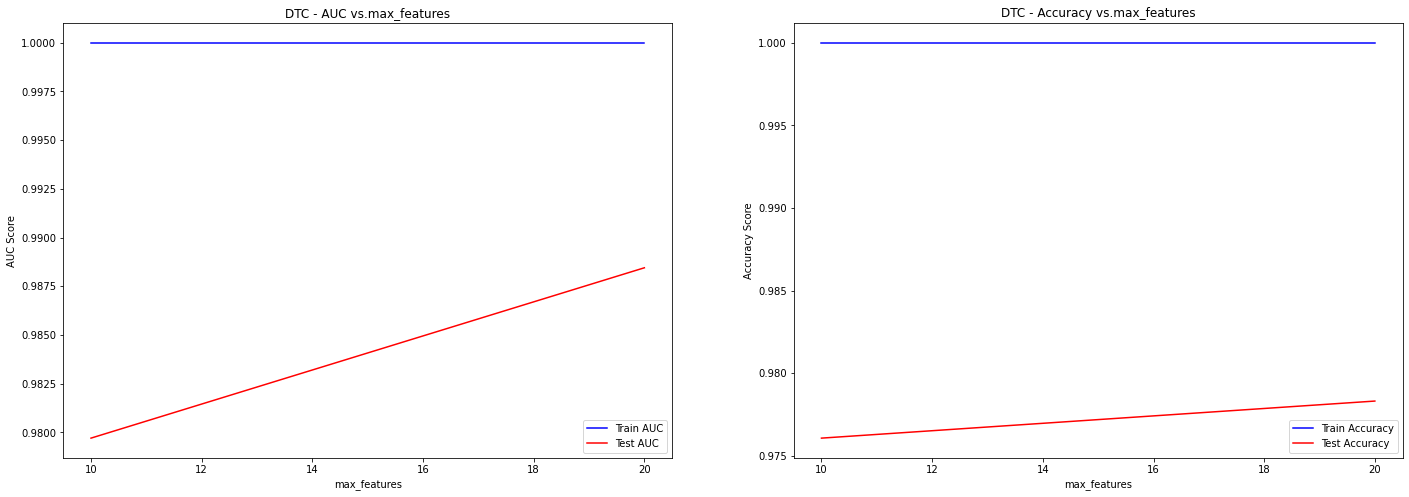

In [98]:
hyper_params = [{'max_depth' : [5,8,10,12]},
                {'criterion' : ['entropy','gini']}, 
                {'min_samples_leaf' : [10,15,20]}, 
                {'min_samples_split' : [20,30,40,50]}, 
                {'max_features' : [10,20]}]

# Tuning each hyperparamter individually

for parameter in hyper_params:
    hyper_param_tuning_RFC(list(parameter.keys())[0], parameter[list(parameter.keys())[0]])

In [ ]:
forest_clf = RandomForestClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100],
    'max_depth': [8, 10, 12],
    'min_samples_split': [30, 40],

}

gs_forest = GridSearchCV(forest_clf, param_grid, cv=3)
gs_forest.fit(X_train_resampled, y_train_resampled)

gs_forest.best_params_

In [96]:
forest2 = RandomForestClassifier(criterion = 'entropy', 
                                 max_depth = 12, 
                                 n_estimators = 100, 
                                 min_samples_split =20, 
                                 random_state = 1)
forest2.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_split=20,
                       random_state=1)

In [97]:
forest2.score(X_train_resampled, y_train_resampled)

0.9960069556256843

In [98]:
forest2.score(X_test_OHE, y_test)

0.9730807577268196

In [99]:
# Look at model performance on train data
forest_train_best = forest2.predict(X_train_resampled)
print('Train:')
print(classification_report(y_train_resampled, forest_train_best))

# Look at model performance on test data
forest_test_best = forest2.predict(X_test_OHE)
print('Test:')
print(classification_report(y_test, forest_test_best))

Train:
                   precision    recall  f1-score   support

Received No Votes       1.00      0.99      0.99     15527
   Received Votes       0.99      1.00      0.99     15527
              Won       1.00      1.00      1.00     15527

         accuracy                           1.00     46581
        macro avg       1.00      1.00      1.00     46581
     weighted avg       1.00      1.00      1.00     46581

Test:
                   precision    recall  f1-score   support

Received No Votes       1.00      0.98      0.99      3891
   Received Votes       0.50      0.83      0.62       107
              Won       0.78      0.50      0.61        14

         accuracy                           0.97      4012
        macro avg       0.76      0.77      0.74      4012
     weighted avg       0.98      0.97      0.98      4012



It appears that the hyperparameter-tuned Random Forest Classifier performed slightly better than the hyperparameter-tuned Decision Tree Classifier, but only marginally. I was next interested in seeing how changing the target variable from multi-class to binary would impact model performance.

# Model V3 - Binary Random Forest

In [100]:
# Change target variable to be binaray instead of multi-class 

y_train_binary = y_train.replace(['Won'],'Received Votes')
y_test_binary = y_test.replace(['Won'],'Received Votes')

In [101]:
X_train_binary_resampled, y_train_binary_resampled = SMOTE().fit_resample(X_train_OHE, y_train_binary)

In [106]:
# GridSearchCV to determine best hyperparameters

clf_binary = RandomForestClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100],
    'max_depth': [8, 12],
    'min_samples_split': [30, 40]

}

gs_forest = GridSearchCV(clf_binary, param_grid, cv=3)
gs_forest.fit(X_train_binary_resampled, y_train_binary_resampled)

gs_forest.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'min_samples_split': 30,
 'n_estimators': 100}

In [102]:
# Fit the hyperparameter-tuned RFC

RFC_best_binary = RandomForestClassifier(criterion = 'entropy', 
                                 max_depth = 12, 
                                 n_estimators = 100, 
                                 min_samples_split =30, 
                                 random_state = 1)

RFC_best_binary.fit(X_train_binary_resampled, y_train_binary_resampled)

RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_split=30,
                       random_state=1)

In [103]:
# Show classification report for train set

y_pred_train_best_binary = RFC_best_binary.predict(X_train_OHE)

print(classification_report(y_train_binary, y_pred_train_best_binary))

                   precision    recall  f1-score   support

Received No Votes       1.00      0.99      0.99     15527
   Received Votes       0.75      1.00      0.85       517

         accuracy                           0.99     16044
        macro avg       0.87      0.99      0.92     16044
     weighted avg       0.99      0.99      0.99     16044



In [104]:
# Show classification report for test set

y_pred_test_best_binary = RFC_best_binary.predict(X_test_OHE)

print(classification_report(y_test_binary, y_pred_test_best_binary))

                   precision    recall  f1-score   support

Received No Votes       1.00      0.98      0.99      3891
   Received Votes       0.56      0.85      0.68       121

         accuracy                           0.98      4012
        macro avg       0.78      0.92      0.83      4012
     weighted avg       0.98      0.98      0.98      4012



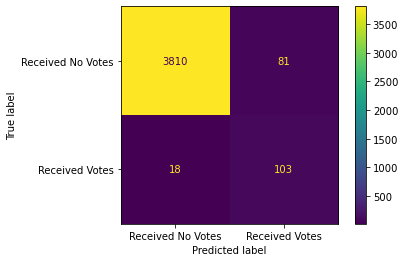

In [107]:
cm = confusion_matrix(y_test_binary, y_pred_test_best_binary, labels = gs_forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gs_forest.classes_)
disp.plot()
plt.show()

It seems that the hyperparameter-tuned binary RFC performed by far the best with a macro average F1-score of 83% and a weighted average F1-score of 98%. Model performance on the minority class was still worse, however the difference in performance is a lot less than it was previously. I wanted to note also that for this particular business case, I believe False Negatives to be more problematic than False Positives because we want to ensure that any player who does deserve to be considered is. It is not as harmful for a player who might not fully meet the statistical criteria to be considered.

With this as my final model, I was next interested to see which features were most important to my model successfully predicting MVP voting.

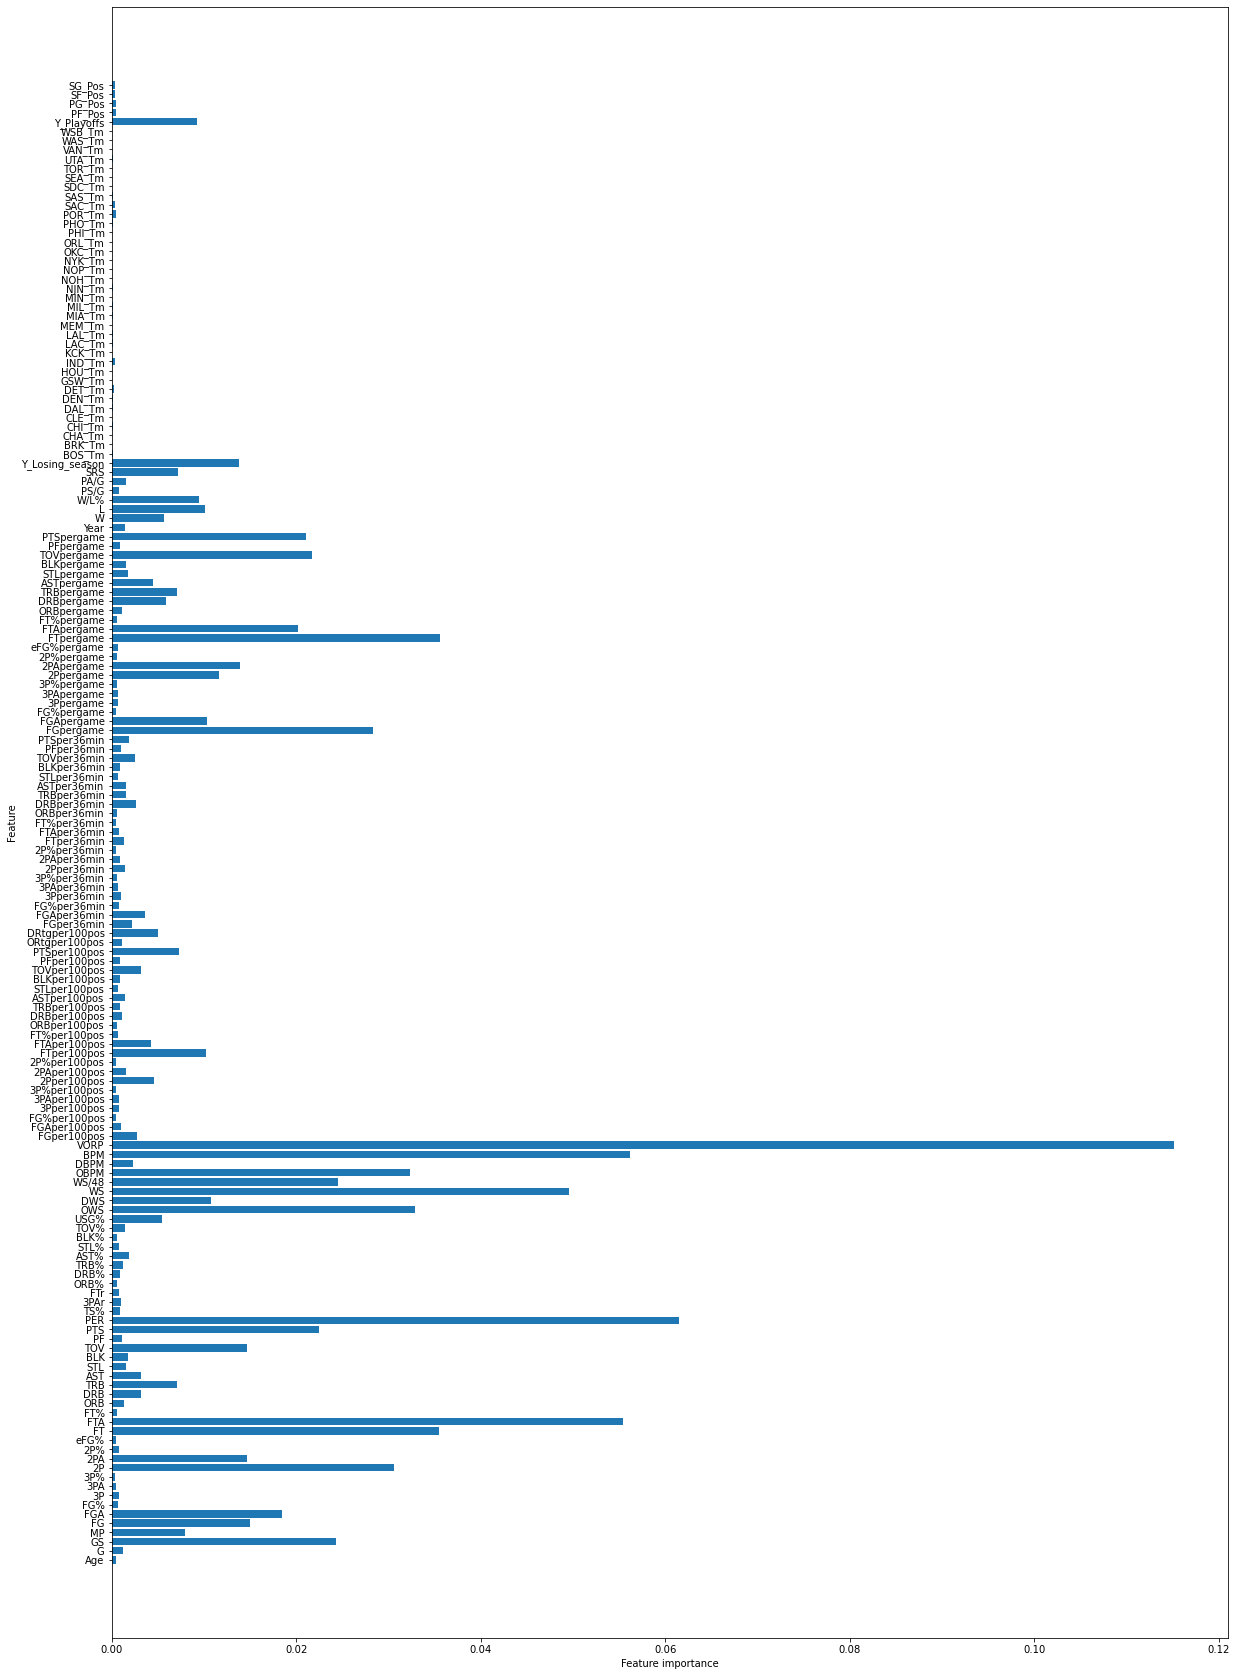

In [108]:
# Define function for plotting feature importances

def plot_feature_importances(model):
    n_features = X_train_OHE.shape[1]
    plt.figure(figsize=(20,30))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train_OHE.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(RFC_best_binary)

The feature importances above confirm my initial findings during EDA - that MVP is largely an offensive award. It seems like the most important features to predicting MVP votes are:
- OWS
- VORP
- PER
- 2P

These are all individual offensive stats. It also looks like team record plays an important role which makes sense - the individual prowess should be coupled with team success because ultimately basketball is a team sport.

I next followed the same steps and made predictions on DPOY.

In [109]:
# Train test split

y = df_dpoy['Category_DPOY']
X = df_dpoy.drop(columns = ['Category_DPOY','joinkey','joinkey2','joinkey3','Team','GB','Player',
                      'Rank-MVP','First-MVP','Pts Won-MVP','Pts Max-MVP','Share-MVP','Rank-DPOY',
                      'First-DPOY','Pts won-DPOY','Pts Max-DPOY','Share-DPOY','Category_MVP','Yr'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [110]:
# Change target variable to be binaray instead of multi-class 

y_train_binary = y_train.replace(['Won'],'Received Votes')
y_test_binary = y_test.replace(['Won'],'Received Votes')

In [111]:
y_train_binary.value_counts()

Received No Votes    15594
Received Votes         450
Name: Category_DPOY, dtype: int64

In [112]:
# SMOTE resampling

print(y_train_binary.value_counts())

X_train_binary_resampled, y_train_binary_resampled = SMOTE().fit_resample(X_train_OHE, y_train_binary)

print(pd.Series(y_train_binary_resampled).value_counts()) 

Received No Votes    15594
Received Votes         450
Name: Category_DPOY, dtype: int64
Received Votes       15594
Received No Votes    15594
Name: Category_DPOY, dtype: int64


RFC Train Performance:
                   precision    recall  f1-score   support

Received No Votes       1.00      0.97      0.98     15594
   Received Votes       0.97      1.00      0.98     15594

         accuracy                           0.98     31188
        macro avg       0.98      0.98      0.98     31188
     weighted avg       0.98      0.98      0.98     31188



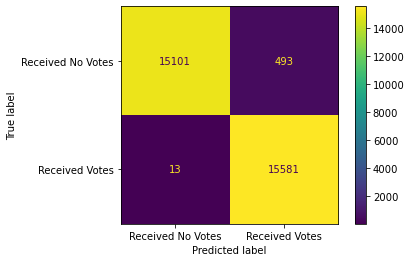

RFC Test Performance:
                   precision    recall  f1-score   support

Received No Votes       0.99      0.96      0.97      3897
   Received Votes       0.33      0.72      0.45       115

         accuracy                           0.95      4012
        macro avg       0.66      0.84      0.71      4012
     weighted avg       0.97      0.95      0.96      4012



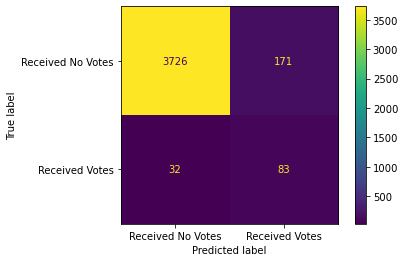

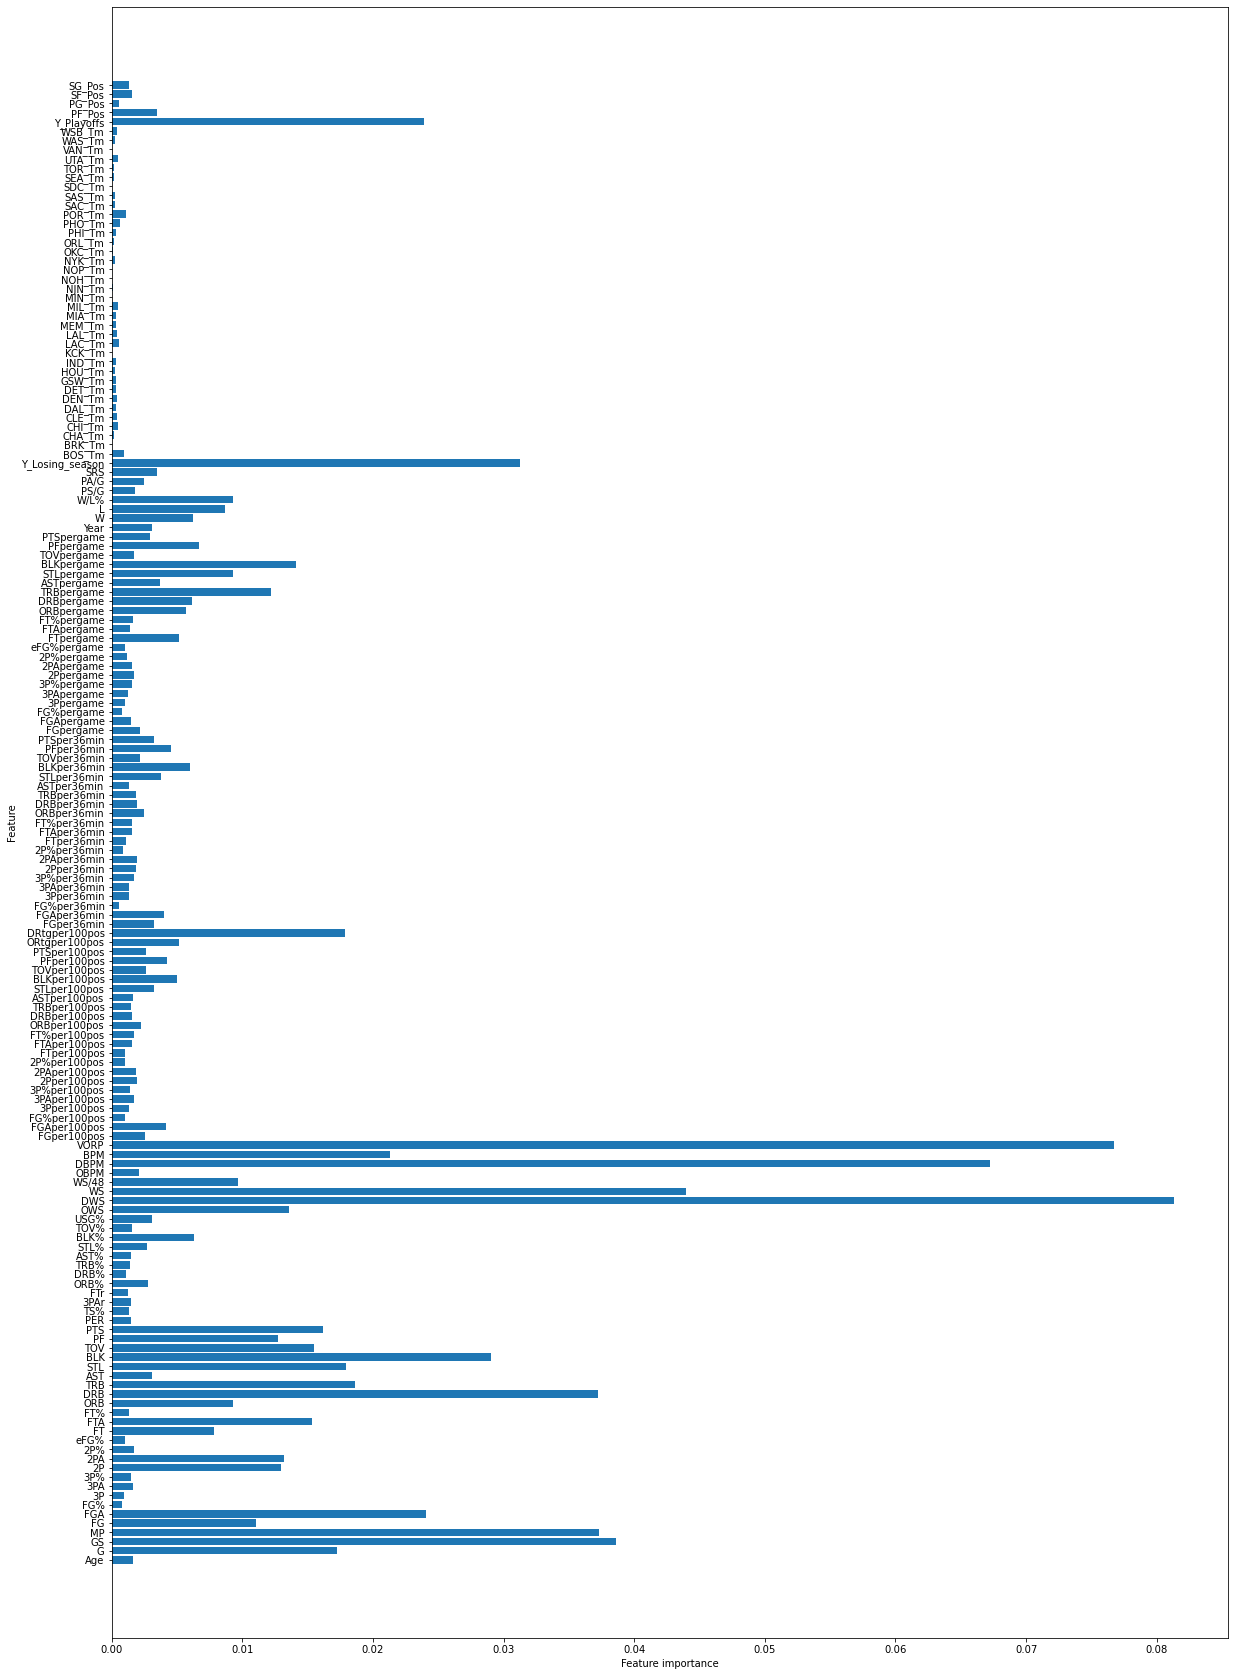

In [114]:
# Test RFC Parameters
clf_binary2 = RandomForestClassifier()

param_grid = param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100],
    'max_depth': [8, 12],
    'min_samples_split': [30, 40]}

gs_forest = GridSearchCV(clf_binary2, param_grid, cv=3)
gs_forest.fit(X_train_binary_resampled, y_train_binary_resampled)

params2 = gs_forest.best_params_
    
    
# Tune Random Forest with best parameters
RFC_best_binary = RandomForestClassifier(criterion = params2['criterion'],
                                  n_estimators = params2['n_estimators'],     
                                  max_depth = params2['max_depth'], 
                                  min_samples_split = params2['min_samples_split'], 
                                  random_state = 1)

RFC_best_binary.fit(X_train_binary_resampled, y_train_binary_resampled)
    
# Use tuned model to predict values
y_pred_train_best_binary2 = RFC_best_binary.predict(X_train_binary_resampled)
y_pred_test_best_binary2 = RFC_best_binary.predict(X_test_OHE)
    
# Return performance summary 
print(color.BOLD + 'RFC Train Performance:' + color.END)
print(classification_report(y_train_binary_resampled, y_pred_train_best_binary2))
    
cm = confusion_matrix(y_train_binary_resampled, y_pred_train_best_binary2, labels = gs_forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gs_forest.classes_)
disp.plot()
plt.show()

print(color.BOLD + 'RFC Test Performance:' + color.END)
print(classification_report(y_test_binary, y_pred_test_best_binary2))
    
cm = confusion_matrix(y_test_binary, y_pred_test_best_binary2, labels = gs_forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gs_forest.classes_)
disp.plot()
plt.show()
    
plot_feature_importances(RFC_best_binary)

Model performance on DPOY predictions seems to be worse than model performance on MVP predictions. The above results indicate a macro average F1-score of 71% and a weighted average F1-score of 96%. The model was much better able to successfully predict the majority class "Received No Votes".

In terms of feature importances - there seems to be some overlap with the MVP predictions model. VORP (Value Over Replacement Player) is also one of the most important features for DPOY predictions. This makes sense given that the stat considers relative value (both offensive and defensive). The most important feature for predicting DPOY vote share was DWS (Defensive Win Share). This makes sense given that the stat is essentially a measure of a player's ability to stop opponents from scoring. Another very important feature is DBPM (Defensive Box Plus Minus) which is a measure of the difference between opponents' offensive production when a player is on the court versus when they are off the court. Also similar to the MVP predictions model - team success seems to also be an important differentiator.

# Evaluation

In summary - the hyperparameter-tuned, Binary Random Forest Classifiers performed best for both MVP and DPOY predictions. I started with Decision Tree Classifiers and iterated to Random Forest Classifiers and not surprisingly - the Random Forest Classifiers showed better performance.

#### MVP Prediction Results (Test Sets):

*Multi-class Decision Tree Classifier*
- Received No Votes - Precision: 99% | Recall: 98% | F1-Score: 99%
- Received Votes - Precision: 46% | Recall: 73% | F1-Score: 56%
- Won - Precision: 58% | Recall: 50% | F1-Score: 54%
- Accuracy: 97%, Weighted Average F1-Score: 97%

*Multi-class Random Forest Classifier*
- Received No Votes - Precision: 100% | Recall: 98% | F1-Score: 99%
- Received Votes - Precision: 50% | Recall: 83% | F1-Score: 62%
- Won - Precision: 78% | Recall: 50% | F1-Score: 61%
- Accuracy: 97%, Weighted Average F1-Score: 98%

*Binary Random Forest Classifier*
- Received No Votes - Precision: 100% | Recall: 98% | F1-Score: 99%
- Received Votes - Precision: 56% | Recall: 85% | F1-Score: 68%
- Accuracy: 98%, Weighted Average F1-Score: 98%

#### DPOY Prediction Results (Test Sets):

*Binary Random Forest Classifier*

- Received No Votes - Precision: 99% | Recall: 96% | F1-Score: 97%
- Received Votes - Precision: 33% | Recall: 72% | F1-Score: 45%
- Accuracy: 95%, Weighted Average F1-Score: 96%

# Recommendations

The Binary Random Forest Classifiers showed an adequate ability to identify potential MVP and DPOY candidates. My recommendation to the NBA would be to use these models in future years as a statistical baseline to identify candidates for award selection. I believe statistical analysis should be coupled with narrative input by the media in order to create a more balanced voting criteria. 

Up to this point, there has been little to no transparency into the NBA's yearly accolade selection process. Players, fans, and media members have an instinctive sense as to what factors *should* or *could* decide an MVP or DPOY. However these factors have not been well defined. I believe that the NBA has an opportunity to create a more rigorous selection process by:

- More concretely defining the criteria for each yearly award (both quantifiable and narrative-based criteria)
- Creating new advanced statistics to quantify the culmination of the pre-defined criteria (i.e. MVP score, DPOY score as a combination of many different statistics weighted accordingly) - to identify a purely statistical ranking for these awards
- Sharing statistical analyses to support yearly candidates for each of the pre-defined criteria with media members to serve as a baseline for voting
- Have media members supplement the above statistical analyses with narrative input to ultimately distribute votes
- Share the final outputs with fans each year so as to provide more transparency into the selection process

By following these steps, the NBA can make yearly award selections more interesting and transparent. At the end of the day, sports awards should be as objective as possible, but fans are interested in both stats and narrative.